# TP BE Météo

## Chargement des librairies

cf readme

In [2]:
library(sf)
library(ggplot2)
library("rnaturalearth")
library("rnaturalearthdata")
library(dplyr)
library(glue)
library(tidyr)

Linking to GEOS 3.12.1, GDAL 3.8.4, PROJ 9.4.0; sf_use_s2() is TRUE


Attaching package: ‘rnaturalearthdata’


The following object is masked from ‘package:rnaturalearth’:

    countries110



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




## Chargement des données

In [3]:
# données complètes
data_full_dir = "../data/donnees-synop-essentielles-omm.csv"
# 31s à s'exécuter sur Stuart

# extract aléatoire des données
data_ext10_dir = "../data/donnees_extracted_10.csv"
# extract aléatoire des données en métropole seulement
data_ext10_met_dir = "../data/donnees_extracted_metro_10.csv"
# 9s à s'exécuter sur stuart


full_data <- read.csv(data_ext10_met_dir, 
            sep=",",                        # à toggle en fonction du fichier
            na.string=c("","null","NaN"),
            header=TRUE, 
            stringsAsFactors=TRUE)

## Affichage synthétique des données chargées

In [4]:
summary(full_data)
# RQE : le read_csv remplace les ' ' par des '.' dans les titres des colonnes

# affiche toutes les colonnes
colnames(full_data)

# affiche les numéros de stations présentes dans le fichier
stations_in_file = unique(unlist(full_data["ID.OMM.station"]))
print(stations_in_file)

 ID.OMM.station                        Date        Pression.au.niveau.mer
 Min.   :7117   2015-08-04T02:00:00+02:00:     8   Min.   : 96320        
 1st Qu.:7149   2015-08-04T08:00:00+02:00:     8   1st Qu.:101280        
 Median :7299   2015-08-04T11:00:00+02:00:     8   Median :101780        
 Mean   :7297   2015-08-04T14:00:00+02:00:     8   Mean   :101749        
 3rd Qu.:7434   2015-08-04T17:00:00+02:00:     8   3rd Qu.:102280        
 Max.   :7558   2015-08-04T20:00:00+02:00:     8   Max.   :104850        
                (Other)                  :234442   NA's   :352           
 Variation.de.pression.en.3.heures Type.de.tendance.barométrique
 Min.   :-1.18e+03                 Min.   :0.000                
 1st Qu.:-7.00e+01                 1st Qu.:2.000                
 Median : 0.00e+00                 Median :4.000                
 Mean   : 2.01e-02                 Mean   :4.332                
 3rd Qu.: 7.00e+01                 3rd Qu.:7.000                
 Max.   : 1.33e+03

[1] "ID.OMM.station"                                           
 [2] "Date"                                                     
 [3] "Pression.au.niveau.mer"                                   
 [4] "Variation.de.pression.en.3.heures"                        
 [5] "Type.de.tendance.barométrique"                            
 [6] "Direction.du.vent.moyen.10.mn"                            
 [7] "Vitesse.du.vent.moyen.10.mn"                              
 [8] "Température"                                              
 [9] "Point.de.rosée"                                           
[10] "Humidité"                                                 
[11] "Visibilité.horizontale"                                   
[12] "Temps.présent"                                            
[13] "Temps.passé.1"                                            
[14] "Temps.passé.2"                                            
[15] "Nebulosité.totale"                                        
[16] "Nébulosité..des.nuages.de.l..étage.inférieur"             
[17] "Hauteur.de.la.base.des.nuages.de.l.étage.inférieur"       
[18] "Type.des.nuages.de.l.étage.inférieur"                     
[19] "Type.des.nuages.de.l.étage.moyen"                         
[20] "Type.des.nuages.de.l.étage.supérieur"                     
[21] "Pression.station"                                         
[22] "Niveau.barométrique"                                      
[23] "Géopotentiel"                                             
[24] "Variation.de.pression.en.24.heures"                       
[25] "Température.minimale.sur.12.heures"                       
[26] "Température.minimale.sur.24.heures"                       
[27] "Température.maximale.sur.12.heures"                       
[28] "Température.maximale.sur.24.heures"                       
[29] "Température.minimale.du.sol.sur.12.heures"                
[30] "Méthode.de.mesure.Température.du.thermomètre.mouillé"     
[31] "Température.du.thermomètre.mouillé"                       
[32] "Rafale.sur.les.10.dernières.minutes"                      
[33] "Rafales.sur.une.période"                                  
[34] "Periode.de.mesure.de.la.rafale"                           
[35] "Etat.du.sol"                                              
[36] "Hauteur.totale.de.la.couche.de.neige..glace..autre.au.sol"
[37] "Hauteur.de.la.neige.fraîche"                              
[38] "Periode.de.mesure.de.la.neige.fraiche"                    
[39] "Précipitations.dans.la.dernière.heure"                    
[40] "Précipitations.dans.les.3.dernières.heures"               
[41] "Précipitations.dans.les.6.dernières.heures"               
[42] "Précipitations.dans.les.12.dernières.heures"              
[43] "Précipitations.dans.les.24.dernières.heures"              
[44] "Phénomène.spécial.1"                                      
[45] "Phénomène.spécial.2"                                      
[46] "Phénomène.spécial.3"                                      
[47] "Phénomène.spécial.4"                                      
[48] "Nébulosité.couche.nuageuse.1"                             
[49] "Type.nuage.1"                                             
[50] "Hauteur.de.base.1"                                        
[51] "Nébulosité.couche.nuageuse.2"                             
[52] "Type.nuage.2"                                             
[53] "Hauteur.de.base.2"                                        
[54] "Nébulosité.couche.nuageuse.3"                             
[55] "Type.nuage.3"                                             
[56] "Hauteur.de.base.3"                                        
[57] "Nébulosité.couche.nuageuse.4"                             
[58] "Type.nuage.4"                                             
[59] "Hauteur.de.base.4"                                        
[60] "Coordonnees"                                              
[61] "Nom"                                                      
[62] "Type.de.tendance.barométrique.

[1] 7510 7149 7168 7139 7558 7434 7117 7299


## Compte les NaN dans par lignes et station

In [5]:
# Pour avoir le nombre de NaN
# result <- full_data %>%
#   group_by(ID.OMM.station) %>%
#   summarise(across(everything(), ~ sum(is.na(.x))))



# pour avoir le %age
result <- full_data %>%
  group_by(ID.OMM.station) %>%
  summarise(across(everything(), ~ {
    n_total <- n()
    n_na <- sum(is.na(.x))
    ifelse(n_total == 0, NA, n_na / n_total * 100)
  }))
print(result)


# adapte les dimensions
result_long <- result %>%
  pivot_longer(
    cols = -ID.OMM.station,
    names_to = "column",
    values_to = "na_count"
  )

# A tibble: 8 × 82
  ID.OMM.station  Date Pression.au.niveau.mer Variation.de.pression.en.3.heures
           <int> <dbl>                  <dbl>                             <dbl>
1           7117     0                0.172                             0.213  
2           7139     0                0.956                             1.01   
3           7149     0                0.00340                           0.00340
4           7168     0                0.00681                           0.0204 
5           7299     0                0.0340                            0.0204 
6           7434     0                0.0204                            0.0340 
7           7510     0                0                                 0.0136 
8           7558     0                0.0137                            0.0309 
# ℹ 78 more variables: Type.de.tendance.barométrique <dbl>,
#   Direction.du.vent.moyen.10.mn <dbl>, Vitesse.du.vent.moyen.10.mn <dbl>,
#   Température <dbl>, Point.de.rosée <dbl>, 

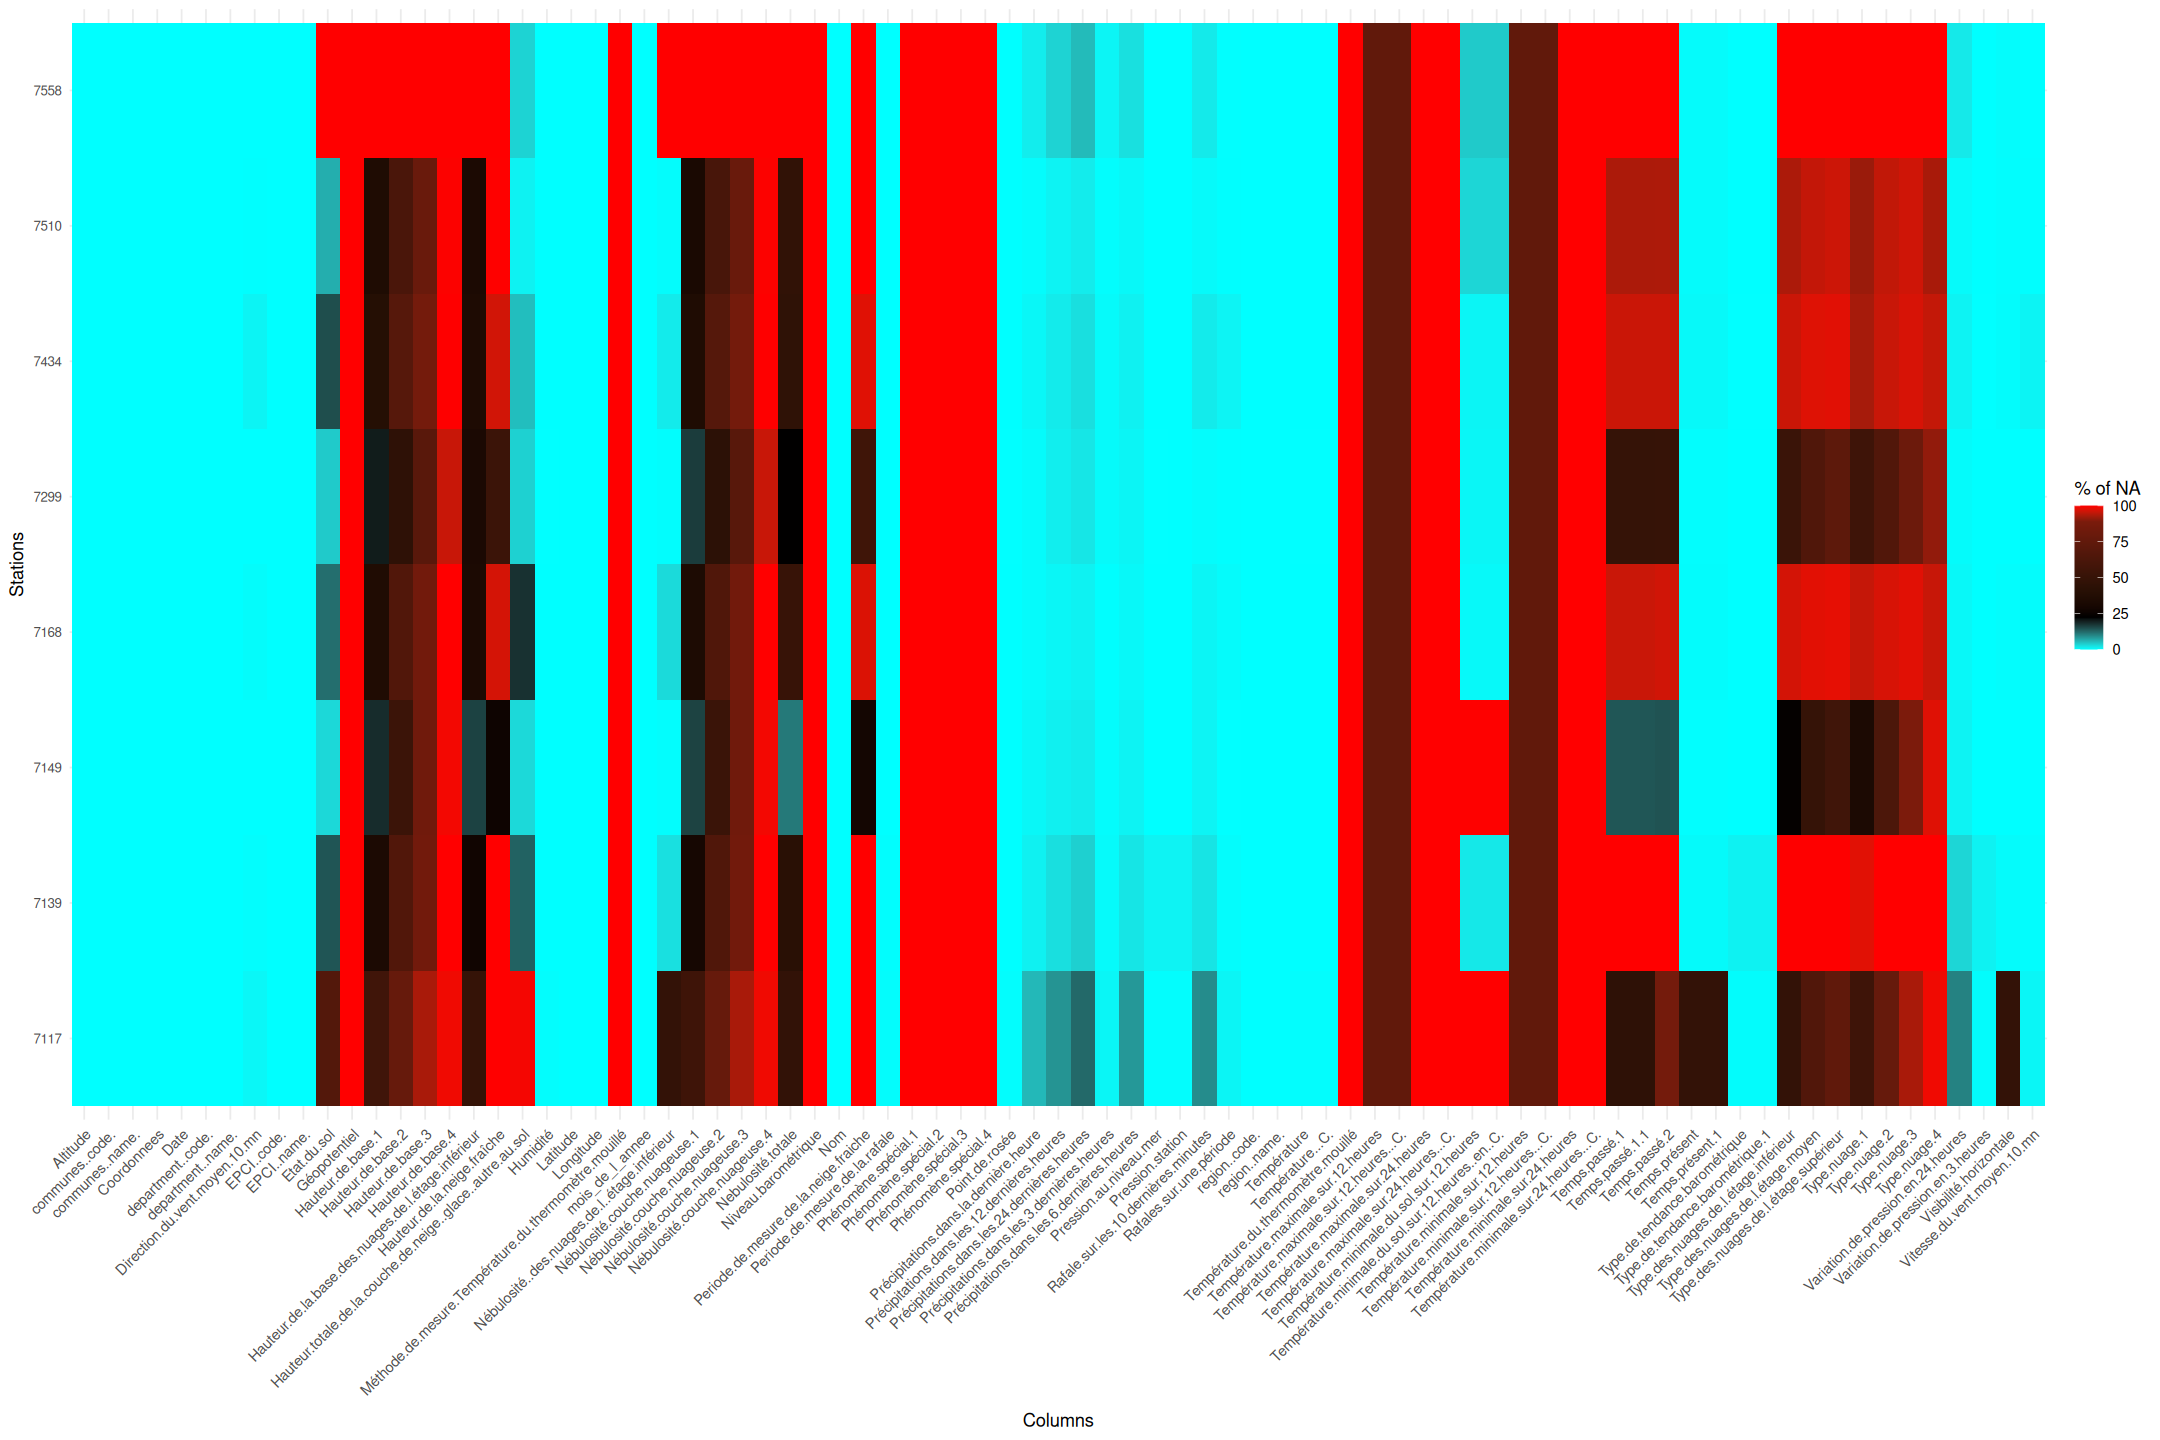

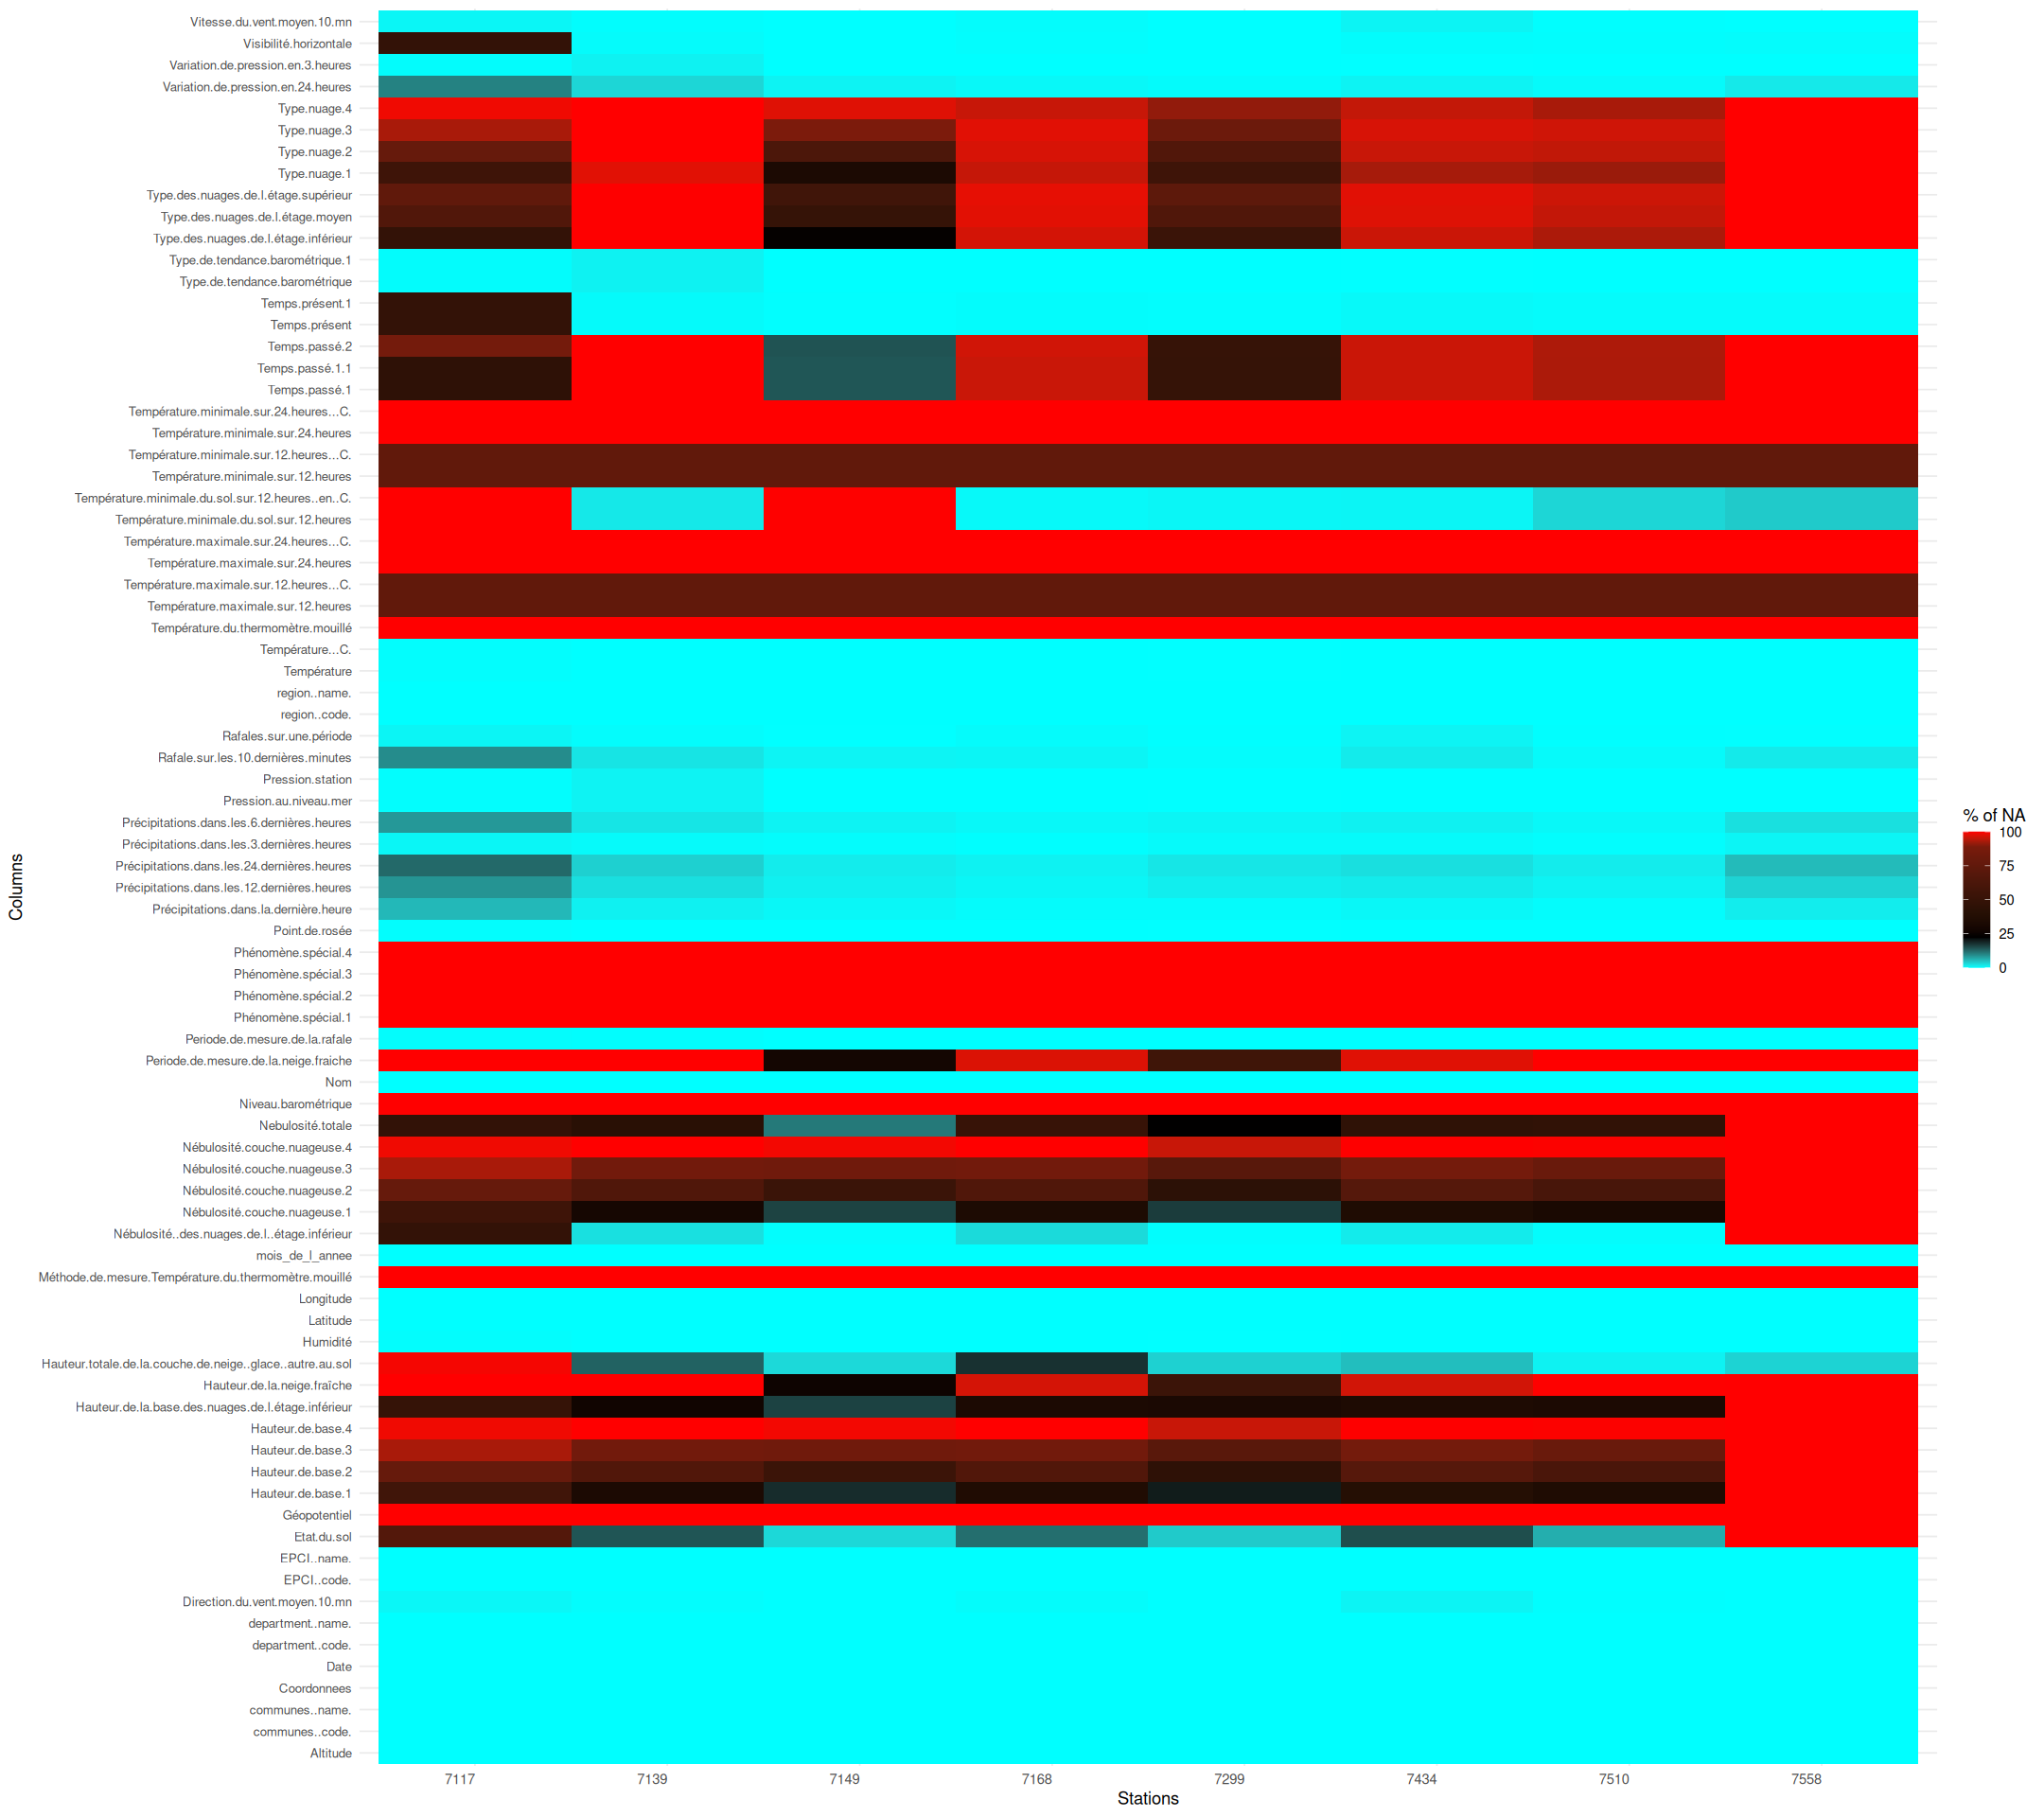

In [ ]:
# Heatmap
options(repr.plot.width=18, repr.plot.height=12)
ggplot(result_long, aes(x = column, y = factor(ID.OMM.station), fill = na_count)) +
  geom_tile() +
  scale_fill_gradientn(colours = c("cyan", "black", "red"),
                       values = scales::rescale(c(0, 0.1, 0.2, 0.8, 0.9))) +
  labs(x = "Columns", y = "Stations", fill = "% of NA") +
  theme_minimal() +
  theme(axis.text.y = element_text(size = 8),
        axis.text.x = element_text(angle = 45, hjust = 1))

# Heatmap Transposed
options(repr.plot.width=18, repr.plot.height=16)
ggplot(result_long, aes(x = factor(ID.OMM.station), y = column, fill = na_count)) +
  geom_tile() +
  scale_fill_gradientn(colours = c("cyan", "black", "red"),
                       values = scales::rescale(c(0, 0.1, 0.2, 0.8, 0.9))) +
  labs(x = "Stations", y = "Columns", fill = "% of NA") +
  theme_minimal() +
  theme(axis.text.y = element_text(size = 8),
        axis.text.x = element_text(angle = 0, hjust = 1))
  # ggsave("heatmapT.png", width = 10, height = 15, dpi = 300)

options(repr.plot.width=18, repr.plot.height=12)


## Liste toute les valeurs possibles d'une colonne

In [7]:
list_all_values <- function(data, column){
    all_values = unique(unlist(data[column]))
    colname = gsub("[[:punct:]]", " ", column)
    print(glue("All values found in column  '{colname}' : "))
    for(v in all_values){
        print(v)
    }
}

list_all_values(full_data, "communes..name.")

All values found in column  'communes  name ' : 
[1] "Mérignac"
[1] "Athis-Mons"
[1] "Barberey-Saint-Sulpice"
[1] "Cerisé"
[1] "Millau"
[1] "Limoges"
[1] "Perros-Guirec"
[1] "Blotzheim"


## Affiche un histogramme des valeurs d'une colonne

Warning message:
“Removed 393 rows containing non-finite outside the scale range
(`stat_count()`).”


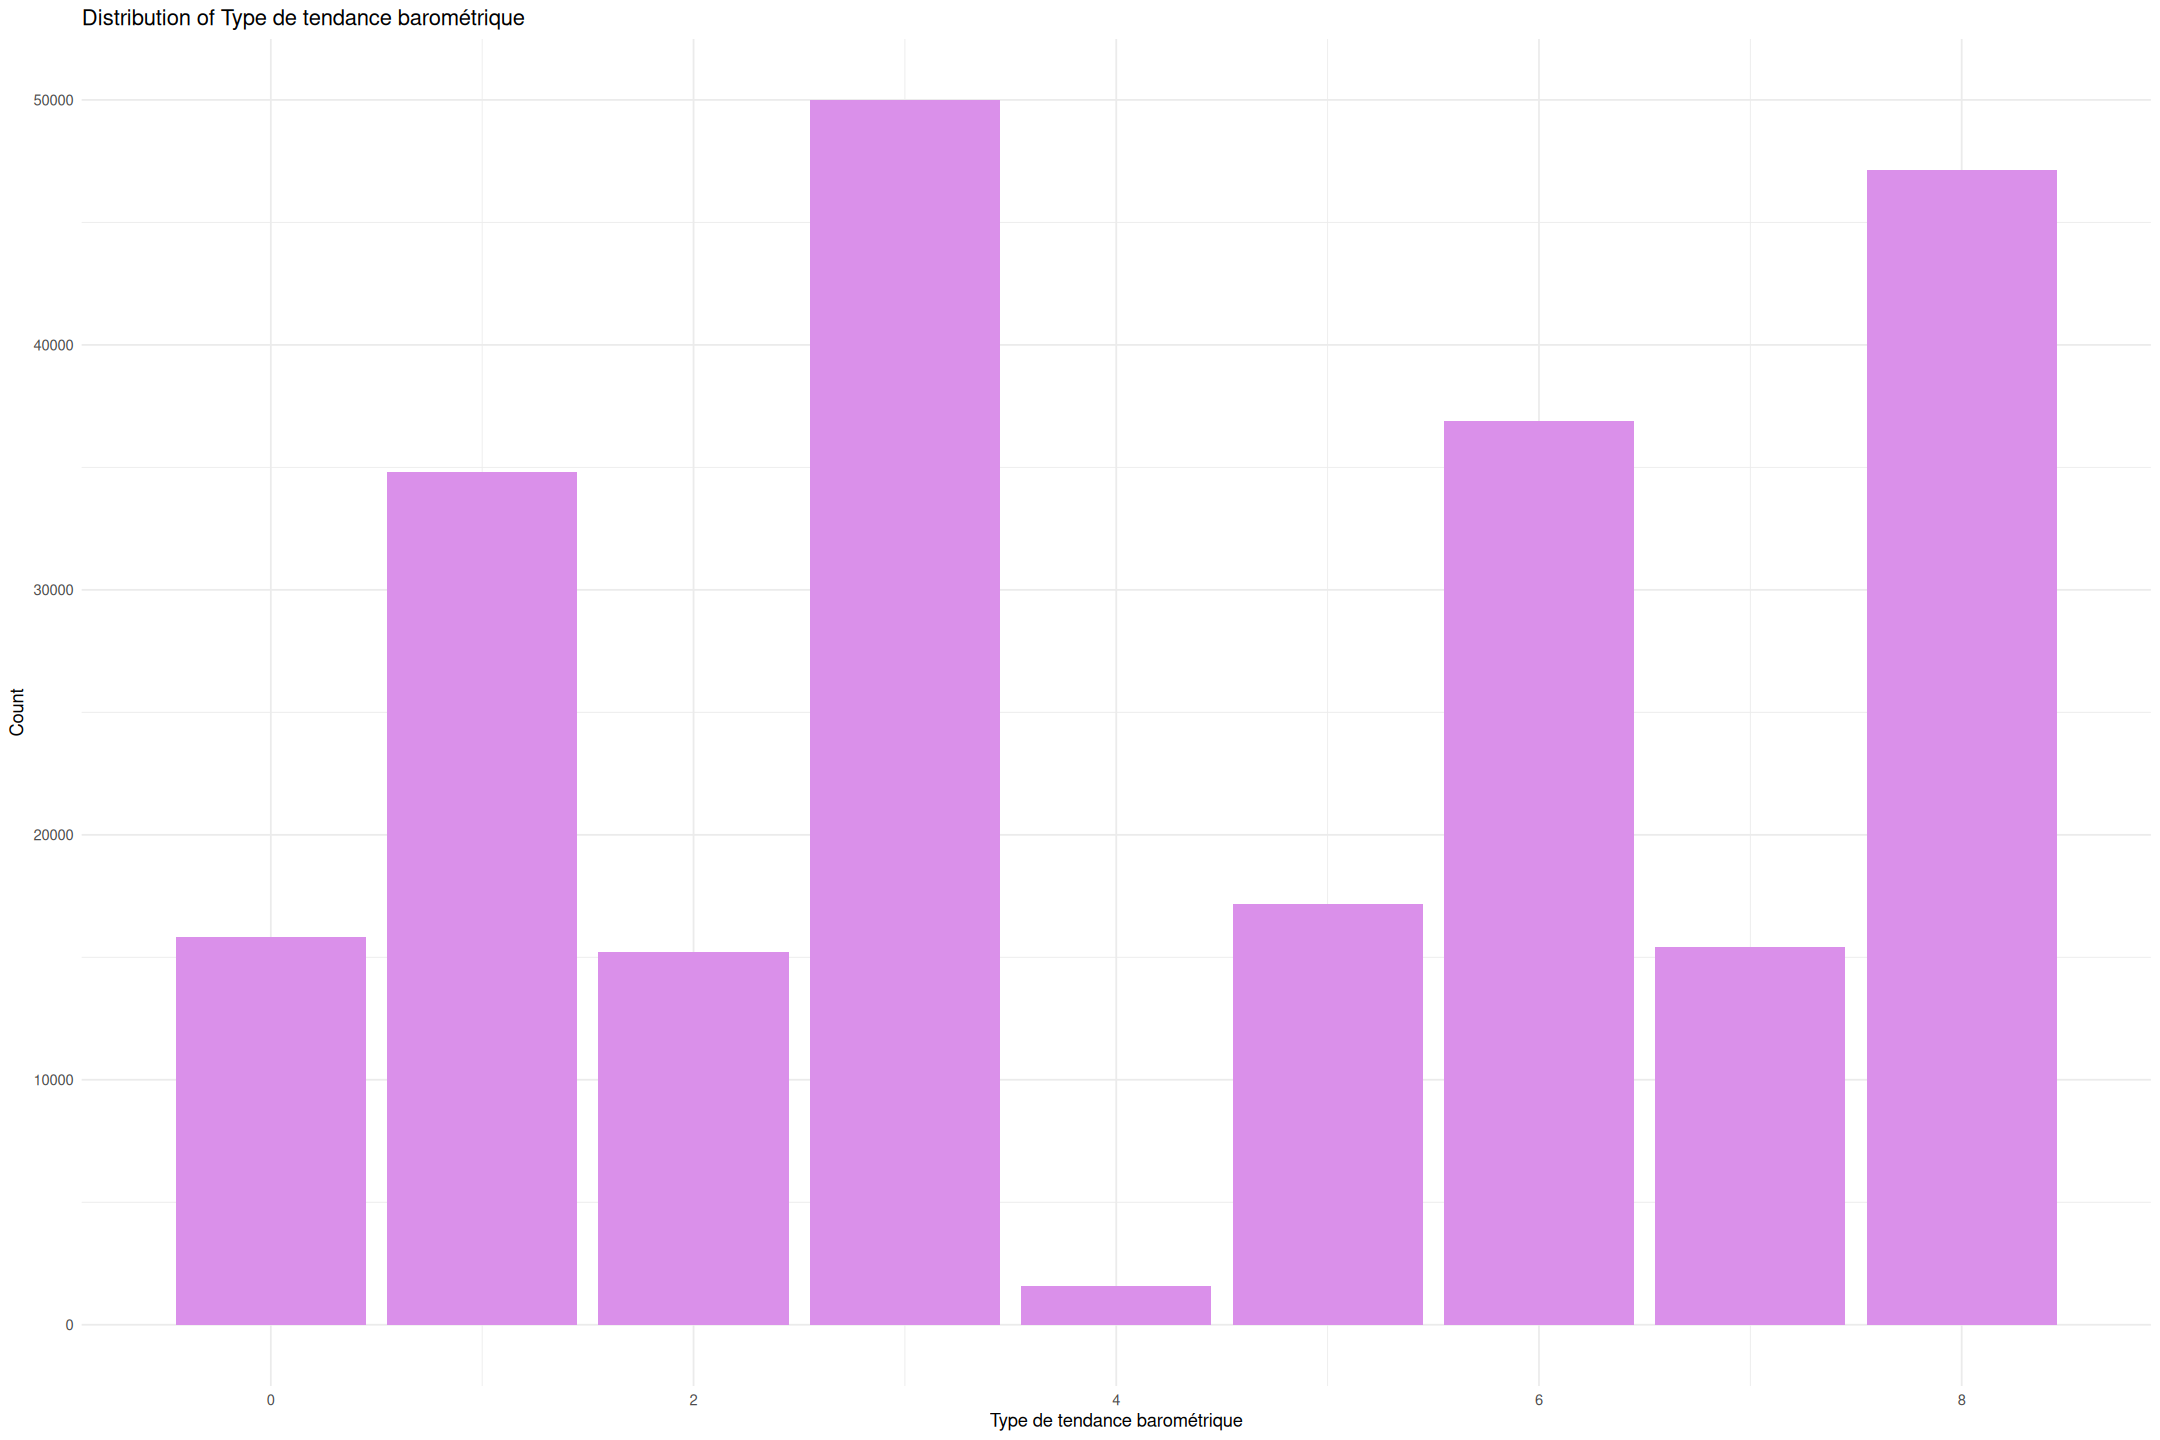

In [8]:
plot_name_distribution <- function(data, column_name) {
  stripped_column = gsub("[[:punct:]]", " ", column_name)
  titlec = paste("Distribution of", stripped_column)

  ggplot(data, aes(x = .data[[column_name]])) +
    geom_bar(fill = "#DA90EA") +
    labs(title = titlec,
         x = stripped_column,
         y = "Count") +
    theme_minimal()
}

plot_name_distribution(full_data, "Type.de.tendance.barométrique")


## Charge le fichier listant toutes les stations 

Fichier généré par CR.ipynb

In [9]:
# hardcoded directories
data_dir <- "../data/"
mesures_dir <-  paste(data_dir, "mesures/", sep="")
stations_csv <- paste(data_dir, "stations.csv", sep="")

stations_df <- read.csv(stations_csv, 
            sep=",", 
            na.string=c("","null","NaN"),
            header=TRUE, 
            stringsAsFactors=FALSE)

colnames(stations_df)

[1] "ID.OMM.station"    "Nom"               "Coordonnees"      
 [4] "Latitude"          "Longitude"         "Altitude"         
 [7] "communes..name."   "communes..code."   "EPCI..name."      
[10] "EPCI..code."       "department..name." "department..code."
[13] "region..name."     "region..code."

## Répartition des stations sur une carte du monde

[1] "sf"         "data.frame"

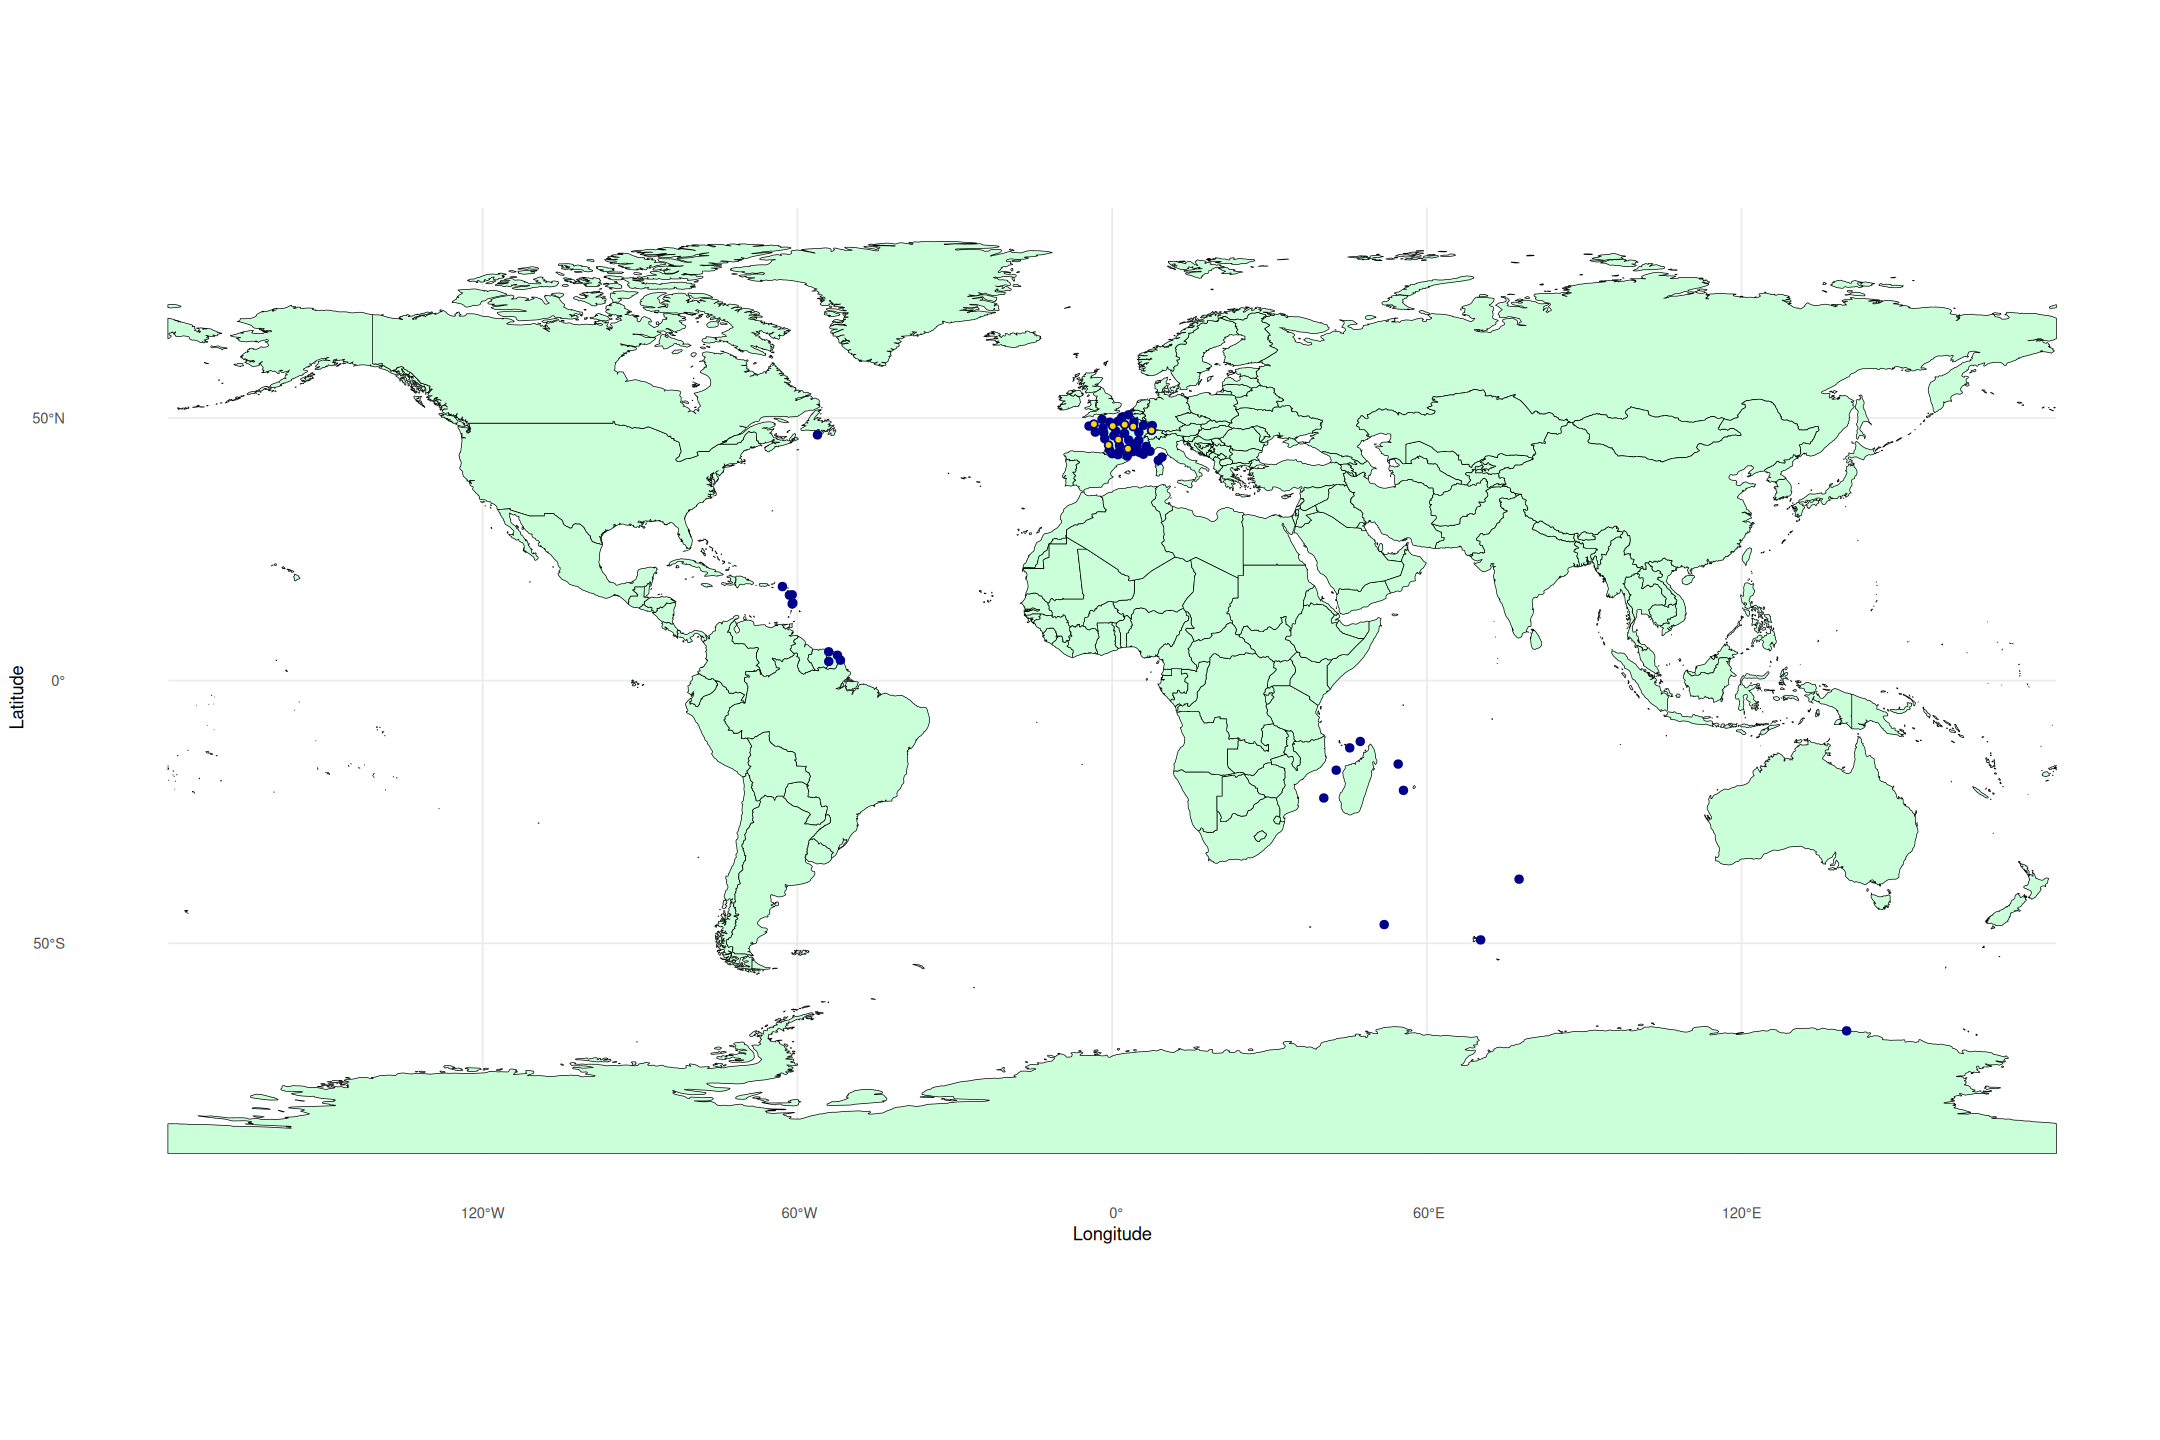

In [10]:

worldmap <- ne_countries(scale = 'medium', type = 'map_units',
                         returnclass = 'sf')
class(worldmap)

# en bleu, les stations présentes dans le fichier de listing des stations.
# en jaune, les stations présentes dans le fichier.
ggplot() +
  geom_sf(data = worldmap, color = "black", fill = "#CAFFDA") +
  geom_point(data = stations_df, aes(x = Longitude, y = Latitude), color = "darkblue", size = 2) +
  geom_point(data = stations_df[stations_df$ID.OMM.station %in% stations_in_file, ], 
            aes(x = Longitude, y = Latitude), 
            color = "gold", size = 1) +
  coord_sf() +
  theme_minimal()

## Répartition des stations sur une carte de France métropolitaine

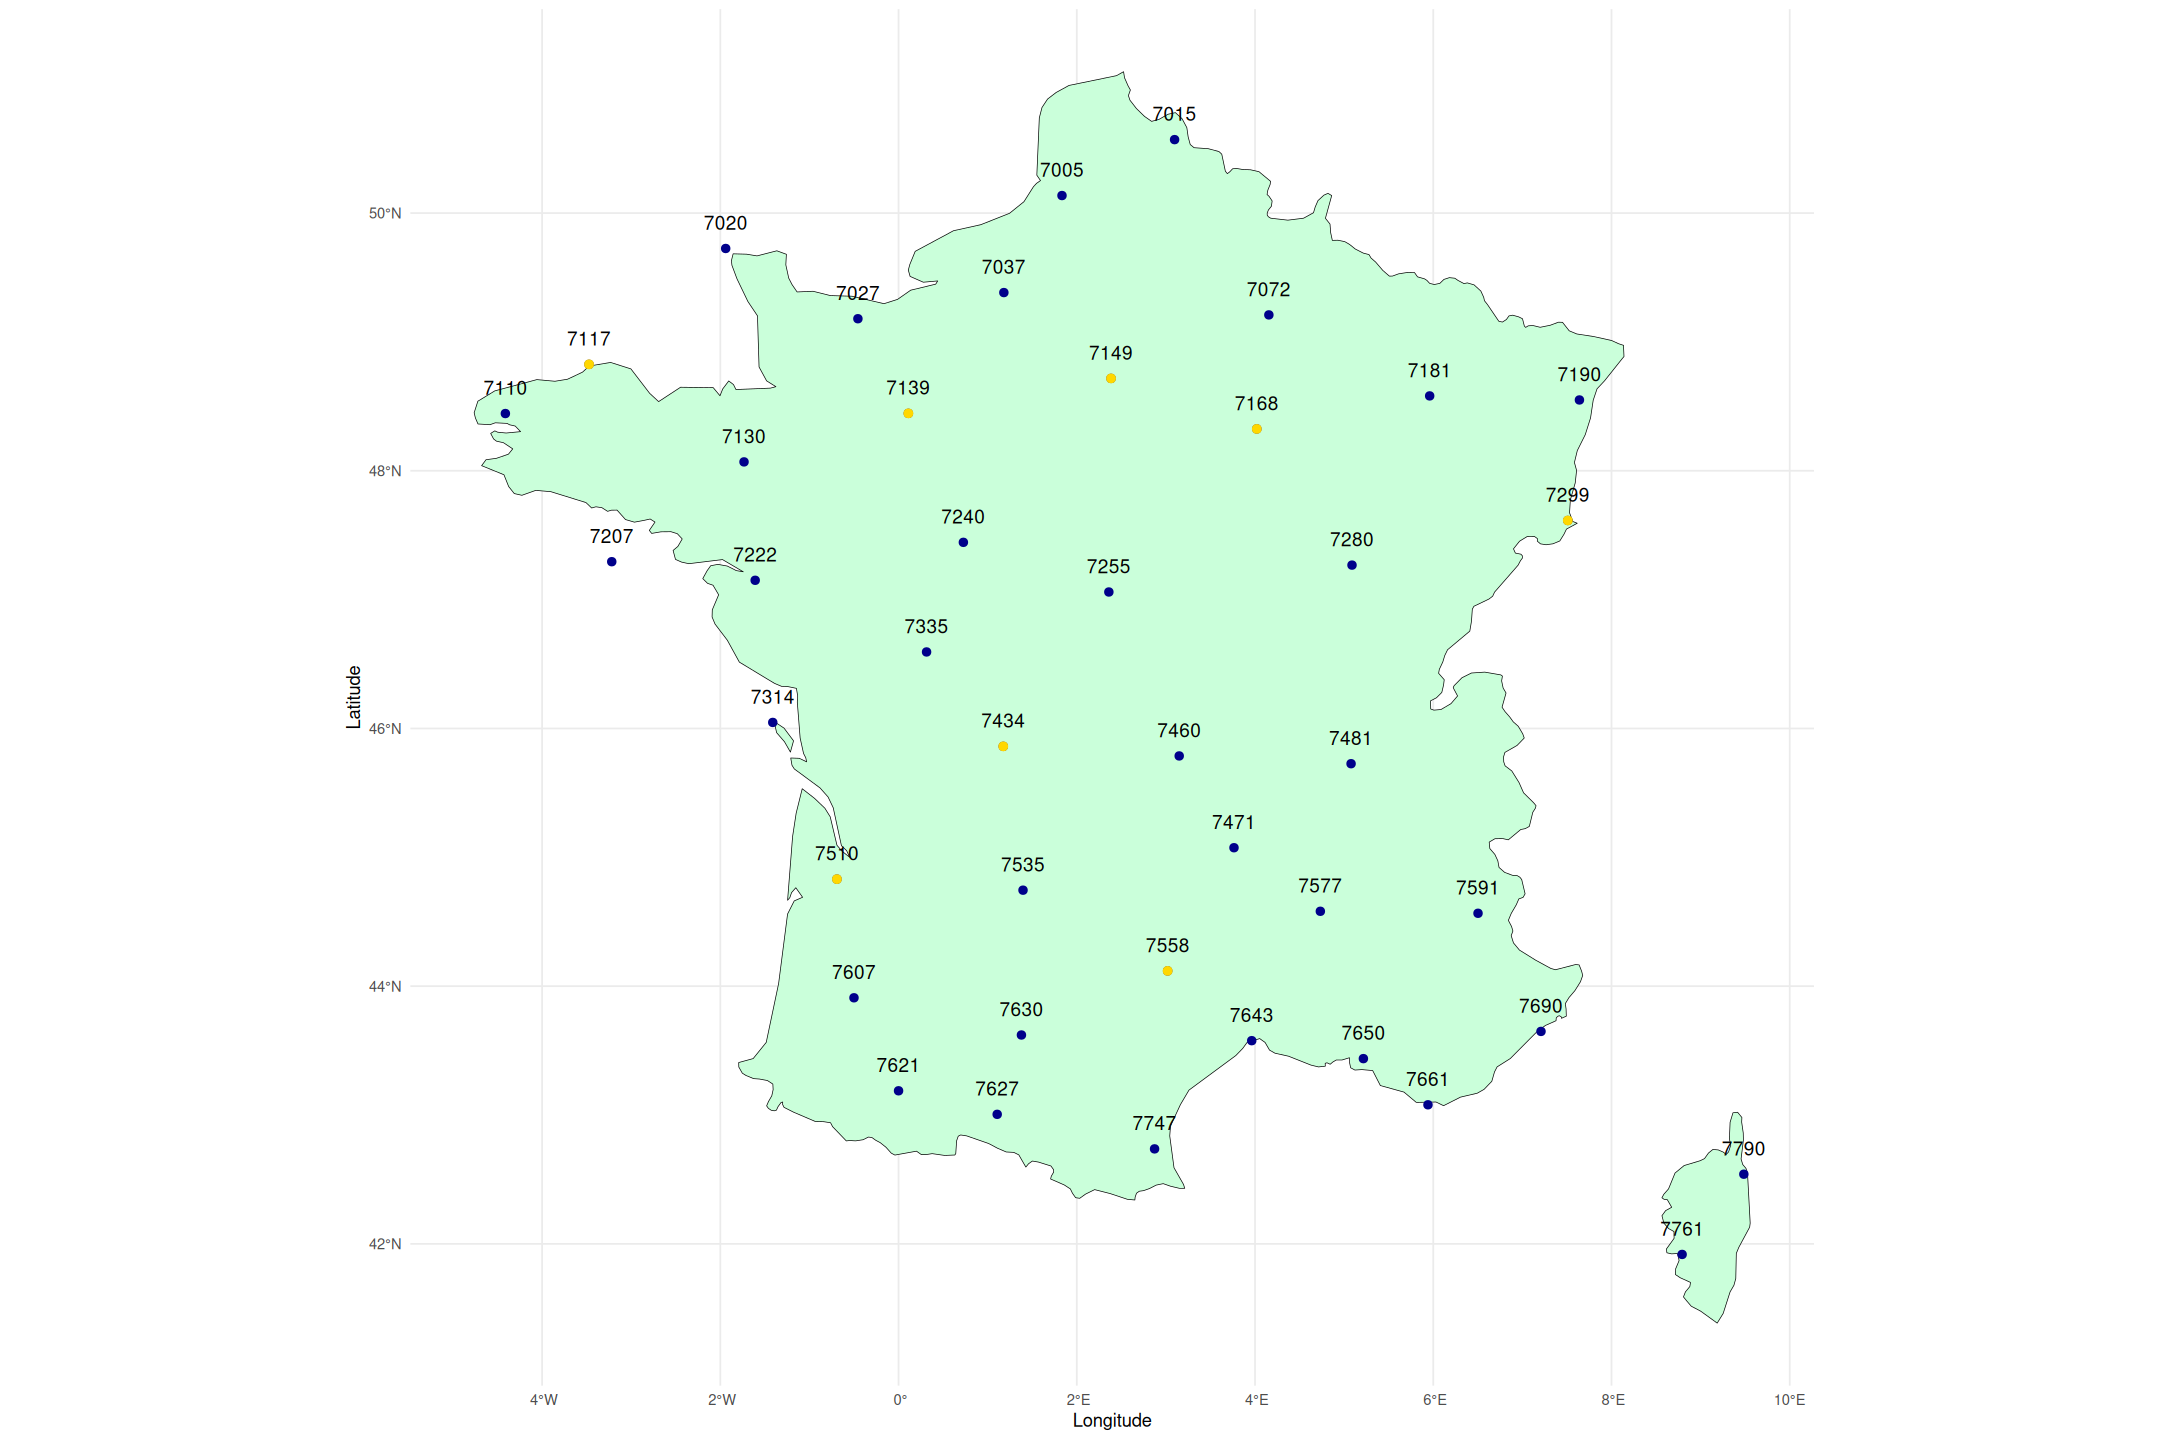

In [11]:
# en bleu, les stations présentes dans le fichier de listing des stations.
# en jaune, les stations présentes dans le fichier.

ggplot() +
  geom_sf(data = worldmap[worldmap$name == 'France',], color = "black", fill = "#CAFFDA") +
  geom_point(data = stations_df[stations_df$Longitude > -10 & stations_df$Longitude < 10, ], 
            aes(x = Longitude, y = Latitude), 
            color = "darkblue", size = 2) +
  coord_sf() +
  geom_text(data = stations_df[stations_df$Longitude > -10 & stations_df$Longitude < 10, ],
              aes(x = Longitude, y = Latitude, label = ID.OMM.station),
              size = 4, color = "black", nudge_y = 0.2) + 
  geom_point(data = stations_df[stations_df$Longitude > -10 & stations_df$Longitude < 10 & stations_df$ID.OMM.station %in% stations_in_file, ], 
            aes(x = Longitude, y = Latitude), 
            color = "gold", size = 2.1) +
  theme_minimal()

[1] 7510 7149 7168 7139 7558 7434 7117 7299
[1] "7117" "7299" "7558" "7510"


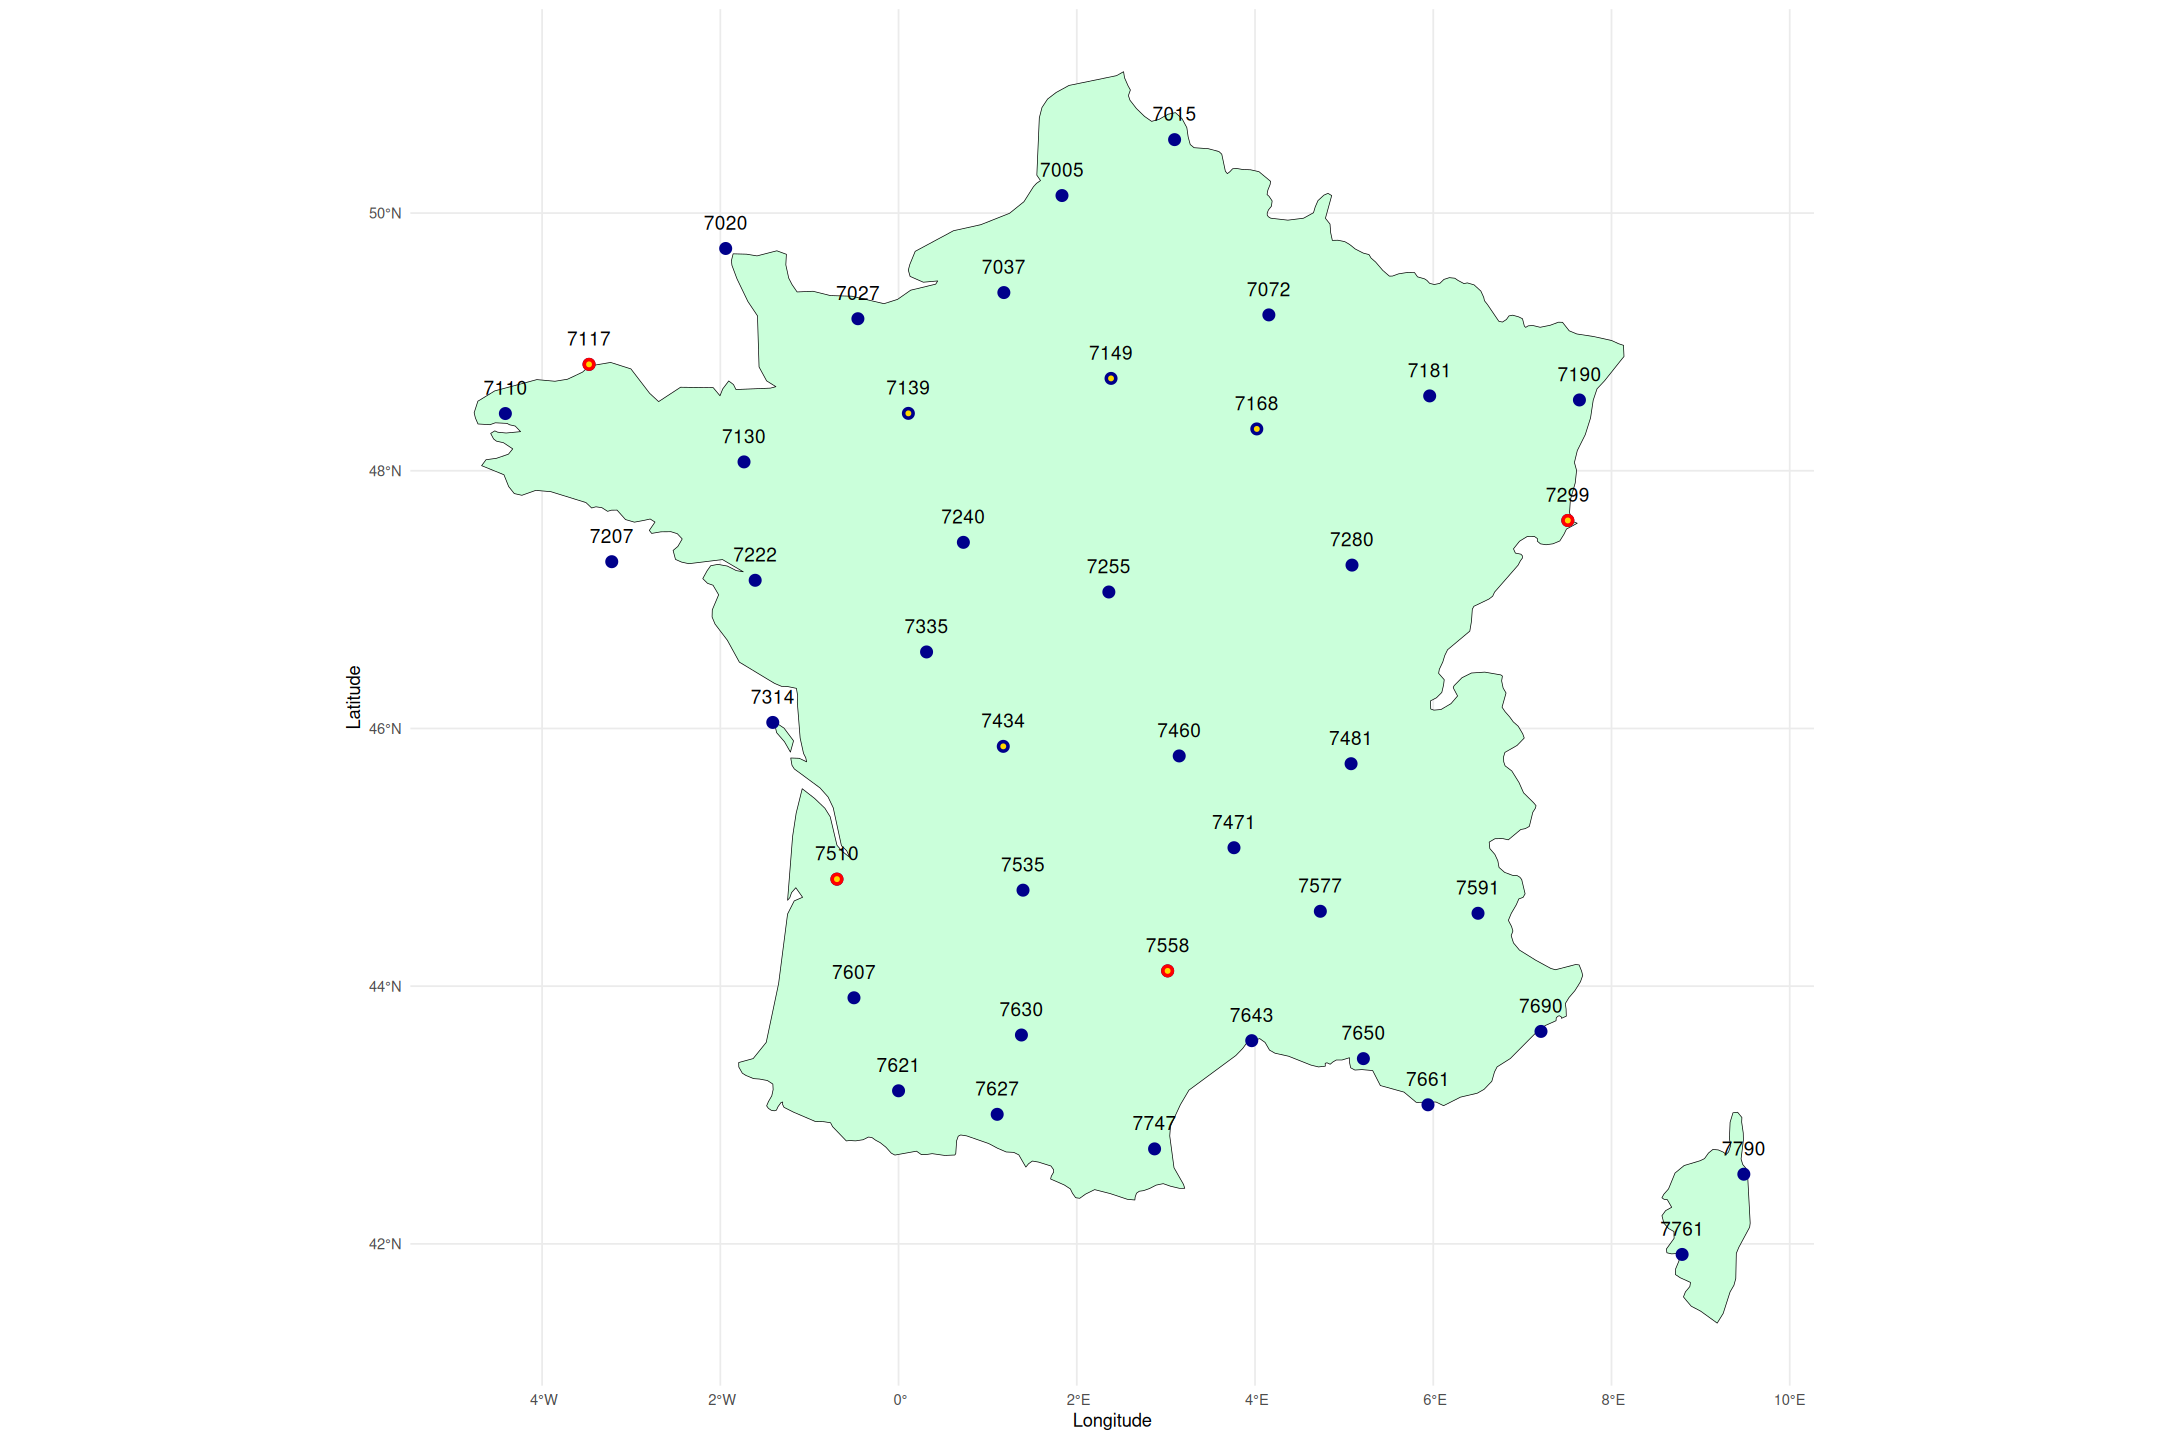

In [ ]:
# sélectionne 4 stations à afficher sur les graphes
chosen_stations = c("7117", "7299", "7558", "7510")
for(station in chosen_stations){
  if(!(station %in% stations_in_file)){
    msg = glue("station {station} not in file ! replace it in the definition of chosen_station.")
    print(msg)
  }
}
print(stations_in_file)
print(chosen_stations)

# en bleu, les stations présentes dans le fichier de listing des stations.
# en jaune, les stations présentes dans le fichier.
# en rouge, une les stations SÉLECTIONNÉES

ggplot() +
  geom_sf(data = worldmap[worldmap$name == 'France',], color = "black", fill = "#CAFFDA") +
  geom_point(data = stations_df[stations_df$Longitude > -10 & stations_df$Longitude < 10, ], 
            aes(x = Longitude, y = Latitude), 
            color = "darkblue", size = 3) +
  geom_point(data = stations_df[stations_df$Longitude > -10 & stations_df$Longitude < 10 & stations_df$ID.OMM.station %in% chosen_stations, ], 
            aes(x = Longitude, y = Latitude), 
            color = "red", size = 3) +
  geom_point(data = stations_df[stations_df$Longitude > -10 & stations_df$Longitude < 10 & stations_df$ID.OMM.station %in% stations_in_file, ], 
            aes(x = Longitude, y = Latitude), 
            color = "gold", size = 1) +
  coord_sf() +
  geom_text(data = stations_df[stations_df$Longitude > -10 & stations_df$Longitude < 10, ],
              aes(x = Longitude, y = Latitude, label = ID.OMM.station),
              size = 4, color = "black", nudge_y = 0.2) + 
  theme_minimal()

## Fonction utiles

In [ ]:

cboxplot <- function(xs, title, legx, legy){
    my_colors <- c("#FFA500", "#008000", "#1E90FF", "#FF1493")
    tryCatch(
        {
            par(bg = 'white')
            boxplot(xs, xlab = legx, ylab = legy, las = 1, col = my_colors)
            grid()
        },
        error=function(e) {
            message('An error occurred (in histogram function)')
            print("with title")
            print(e)
        })
}

In [28]:


# Return columns required, with only the rows related to chosen_stations.
ColumnSelector <- function(columns, chosen_stations){
    return( select(full_data %>% filter(ID.OMM.station %in% chosen_stations), all_of(columns)) )
}


# take a column and a selectionof stations
# Return a dataframe like
#
#   station1    station2    ...
#     c1_1        c2_1      ...
#     c1_2        c2_2
#...
ColumnSplitSelector <- function(column, chosen_stations) {
    selections <- list()
    i = 1
    max_length <- 0

    # First pass: find the maximum length
    for (s in chosen_stations) {
        vec <- full_data %>%
            filter(ID.OMM.station == s) %>%
            pull({{column}})
        selections[[i]] <- vec
        max_length <- max(max_length, length(vec))
        i <- i + 1
    }
    # Second pass: pad each vector with NA to max_length
    for (j in seq_along(selections)) {
        if (length(selections[[j]]) < max_length) {
            selections[[j]] <- c(selections[[j]], rep(NA, max_length - length(selections[[j]])))
        }
    }
    # Combine
    df <- do.call(cbind, selections)
    colnames(df) <- chosen_stations
    colnames(df) <- paste("Station", colnames(df), sep = "_")
    return(as.data.frame(df))
}



# histogramme sur sélection auto
autoboxplot <- function(column, chosen_stations){
    titlec = gsub("[[:punct:]]", " ", column)
    df_extract_cs = ColumnSplitSelector(column, chosen_stations)
    #print(df_extract_cs)
    cboxplot(xs = df_extract_cs, titlec, legx = "Selected stations" ,legy = column)
    #title(titlec)
}


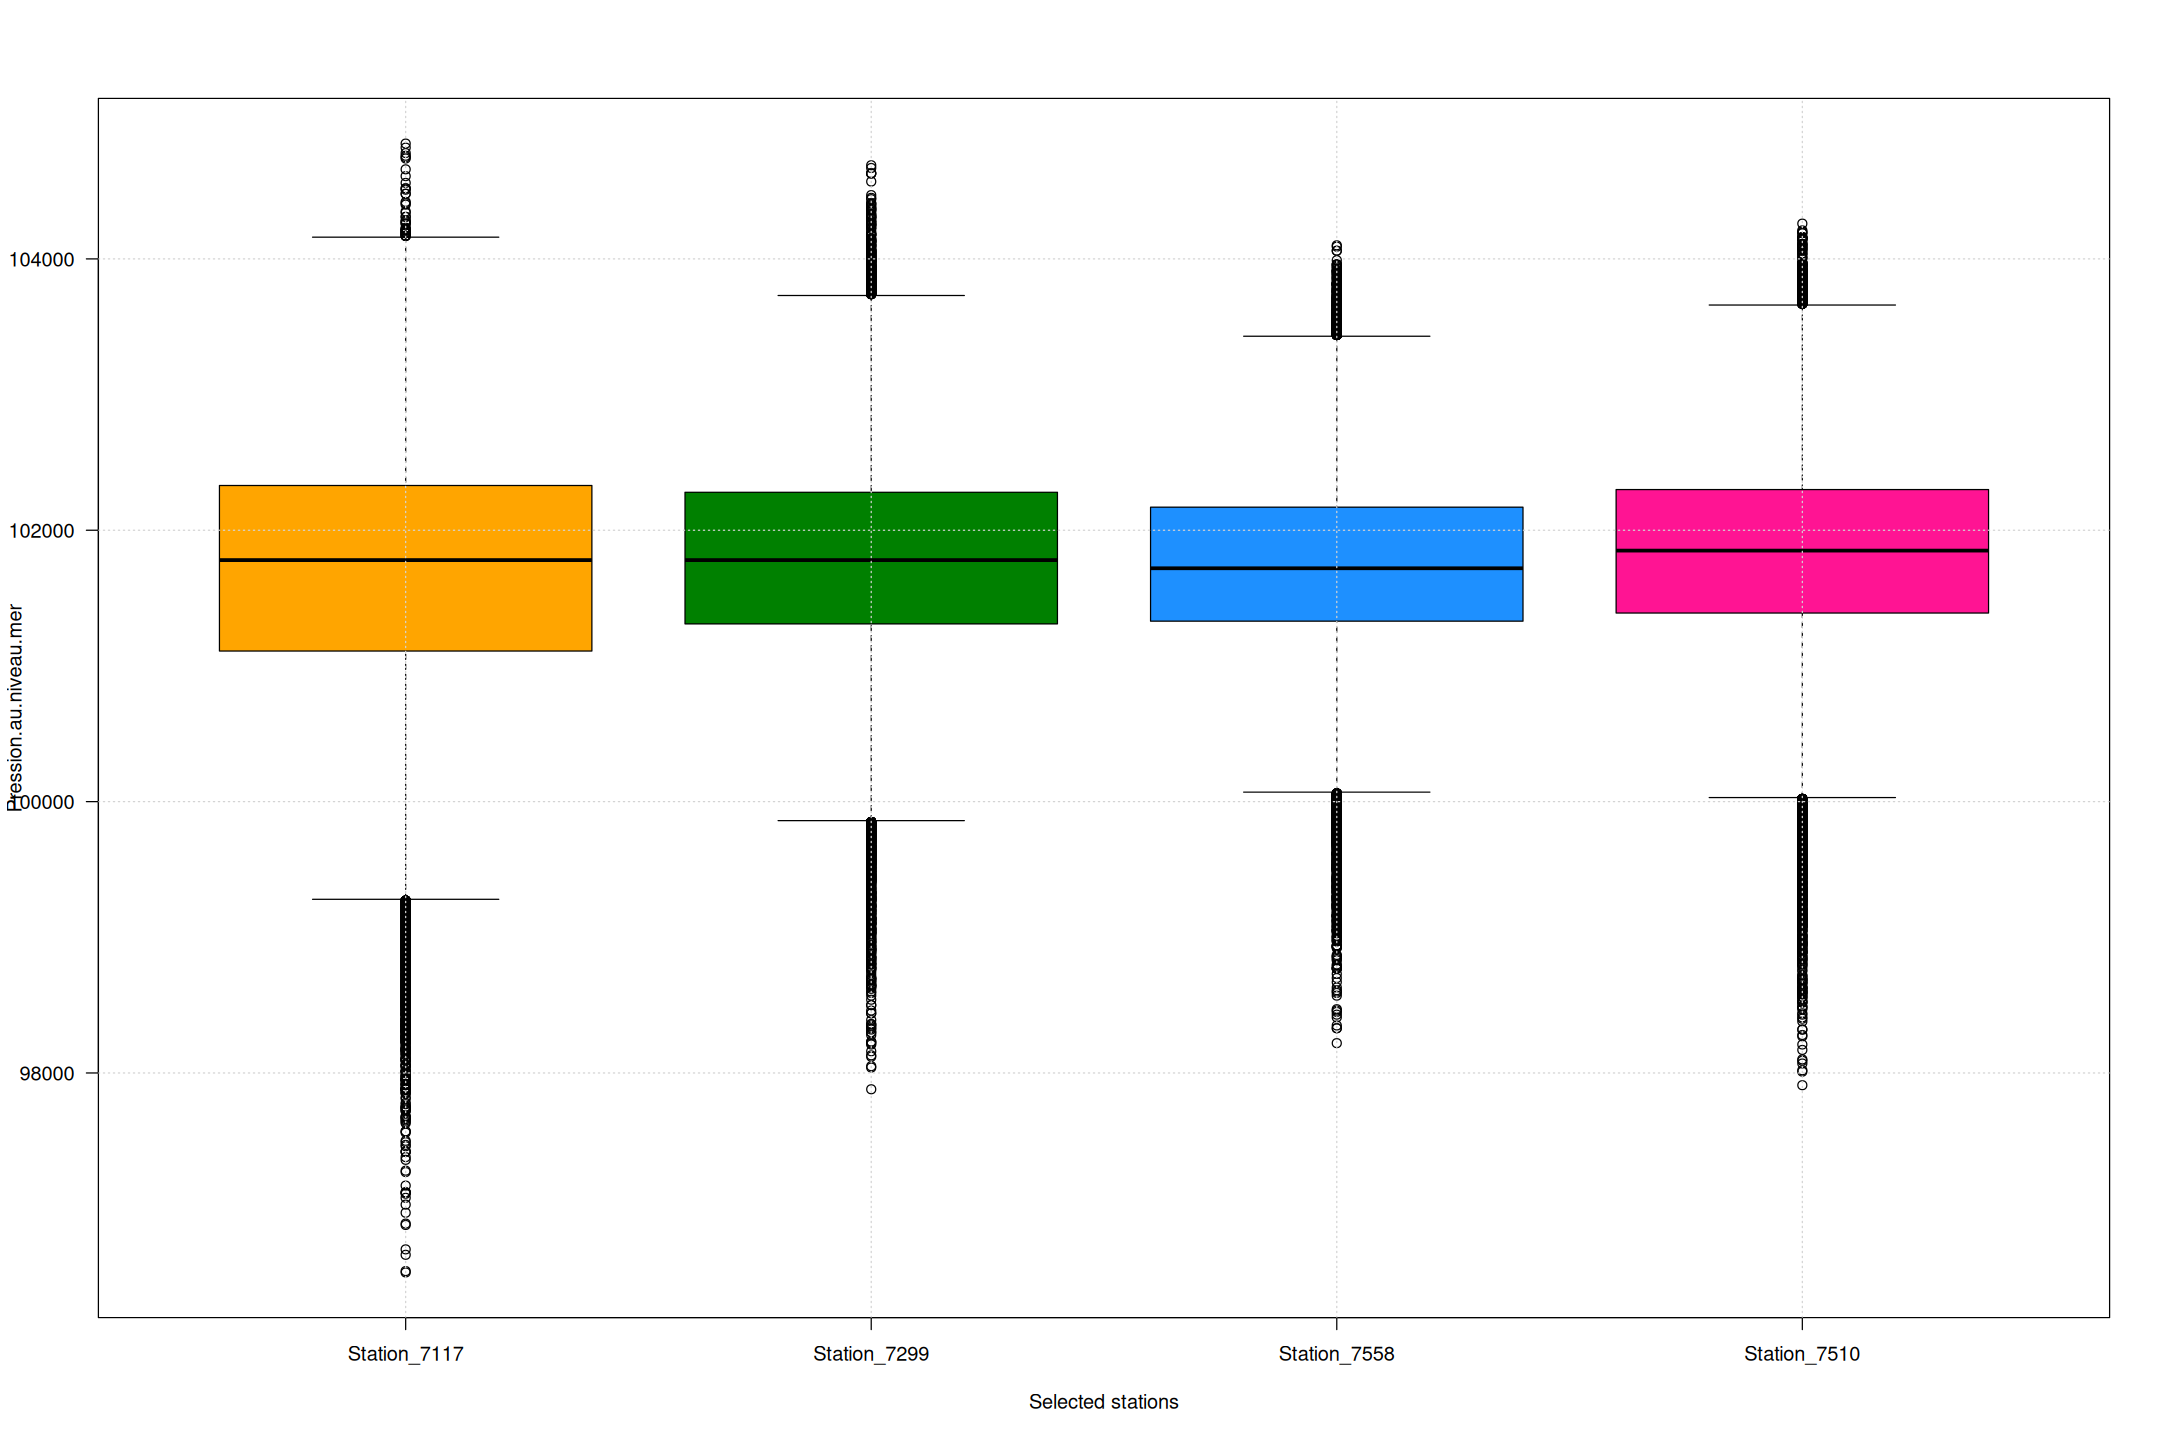

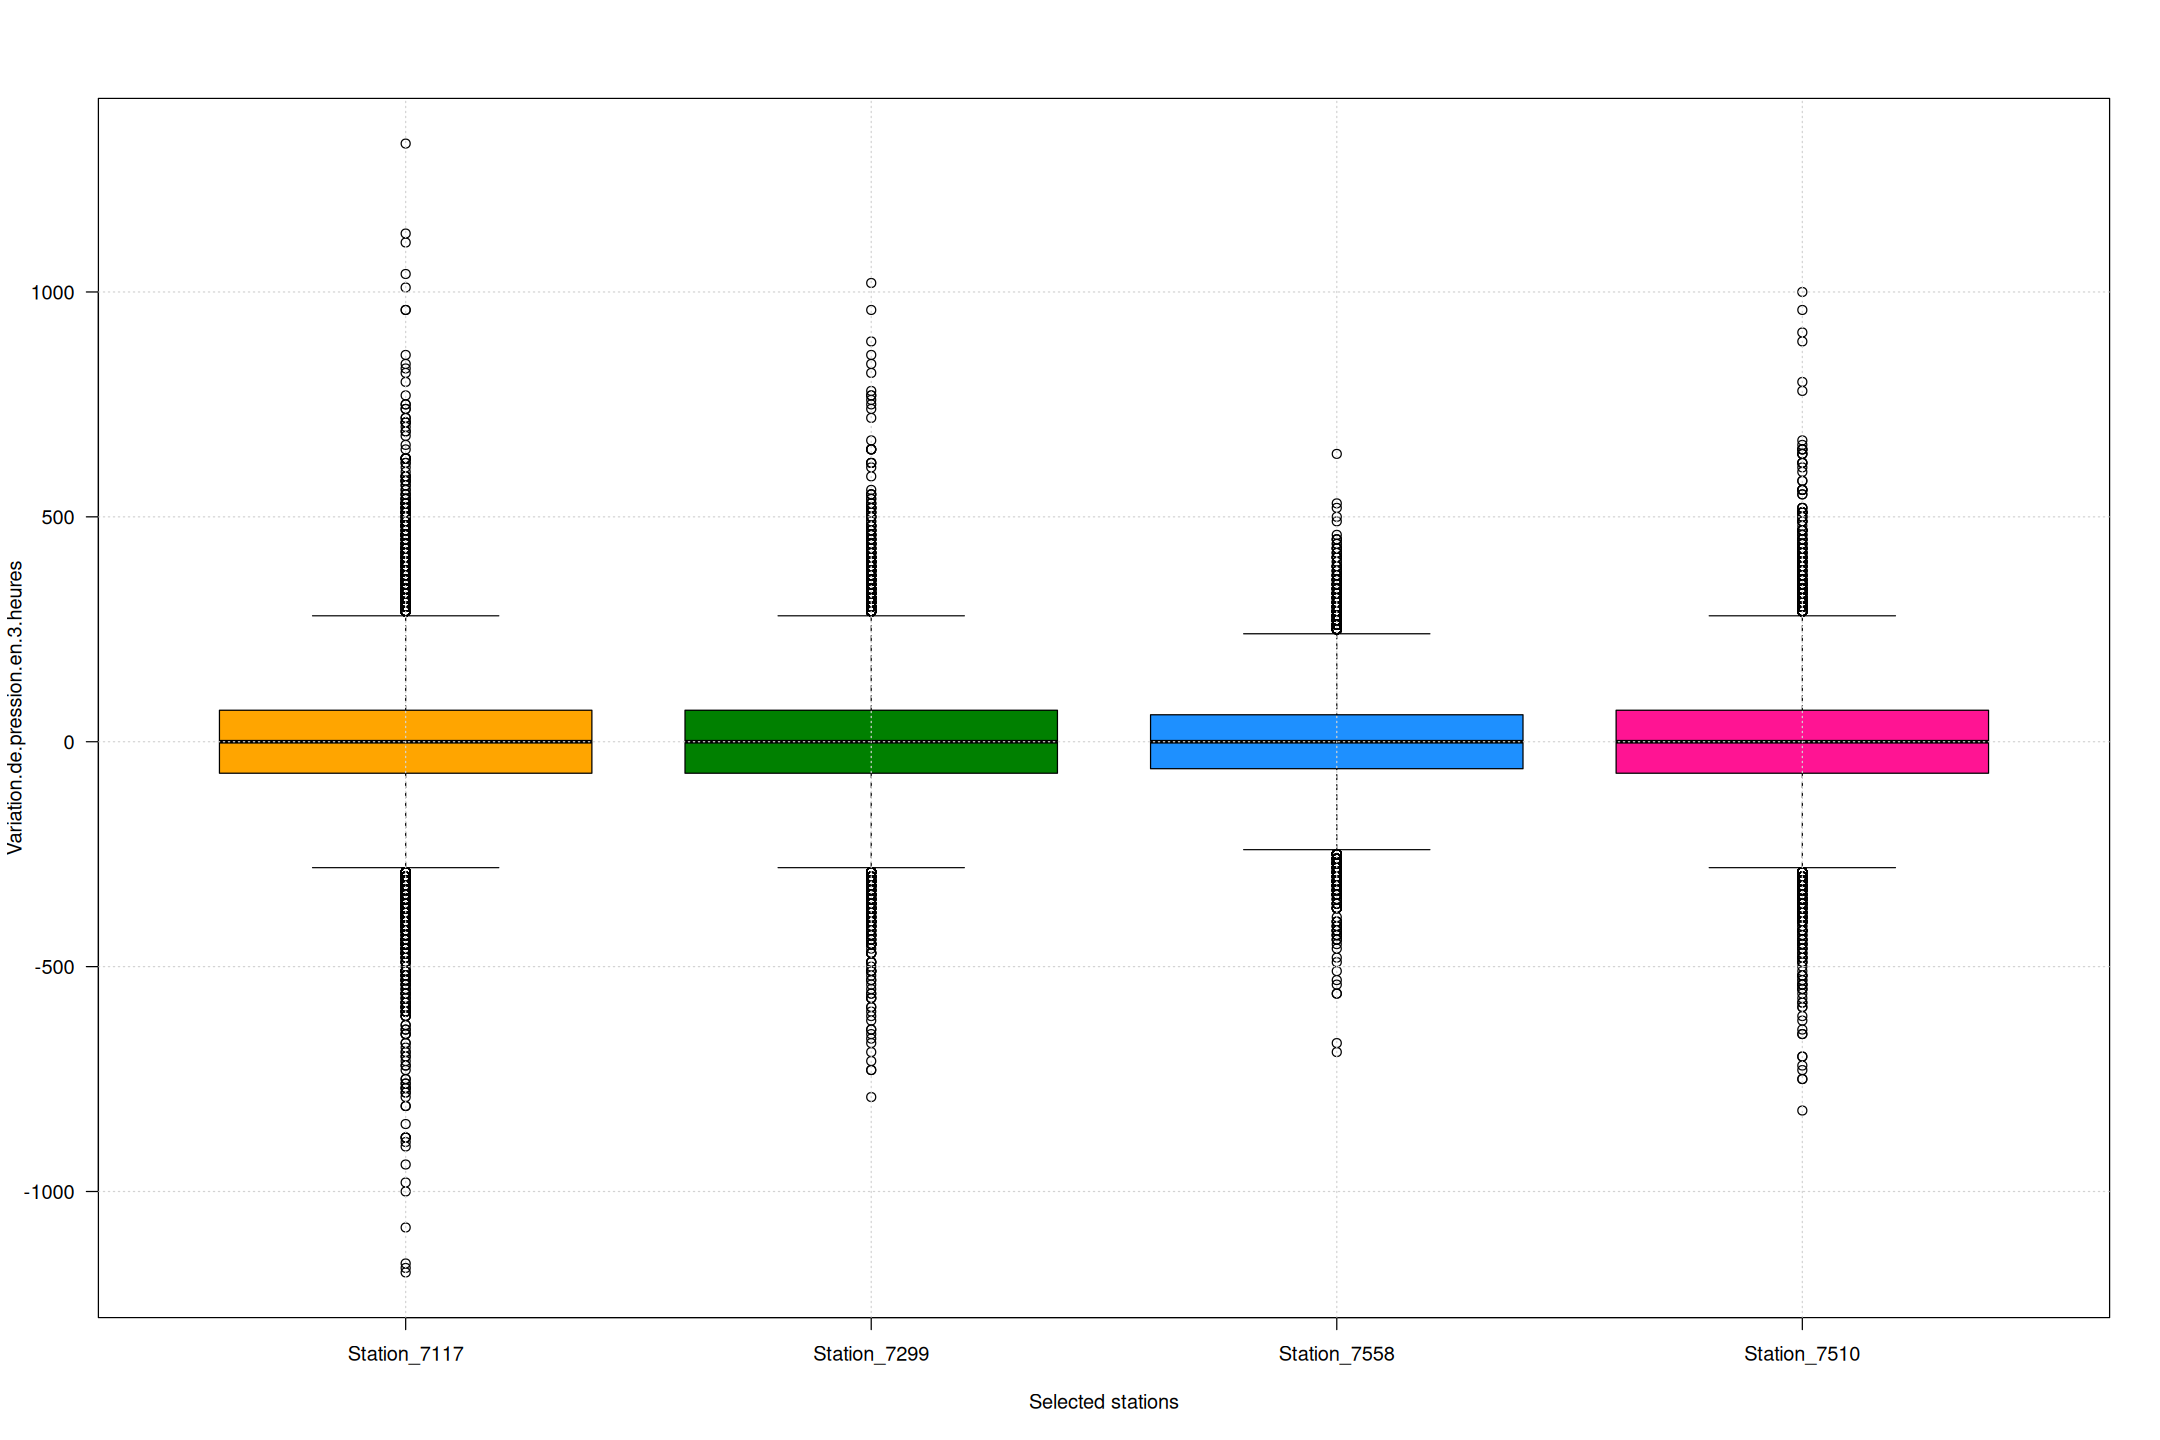

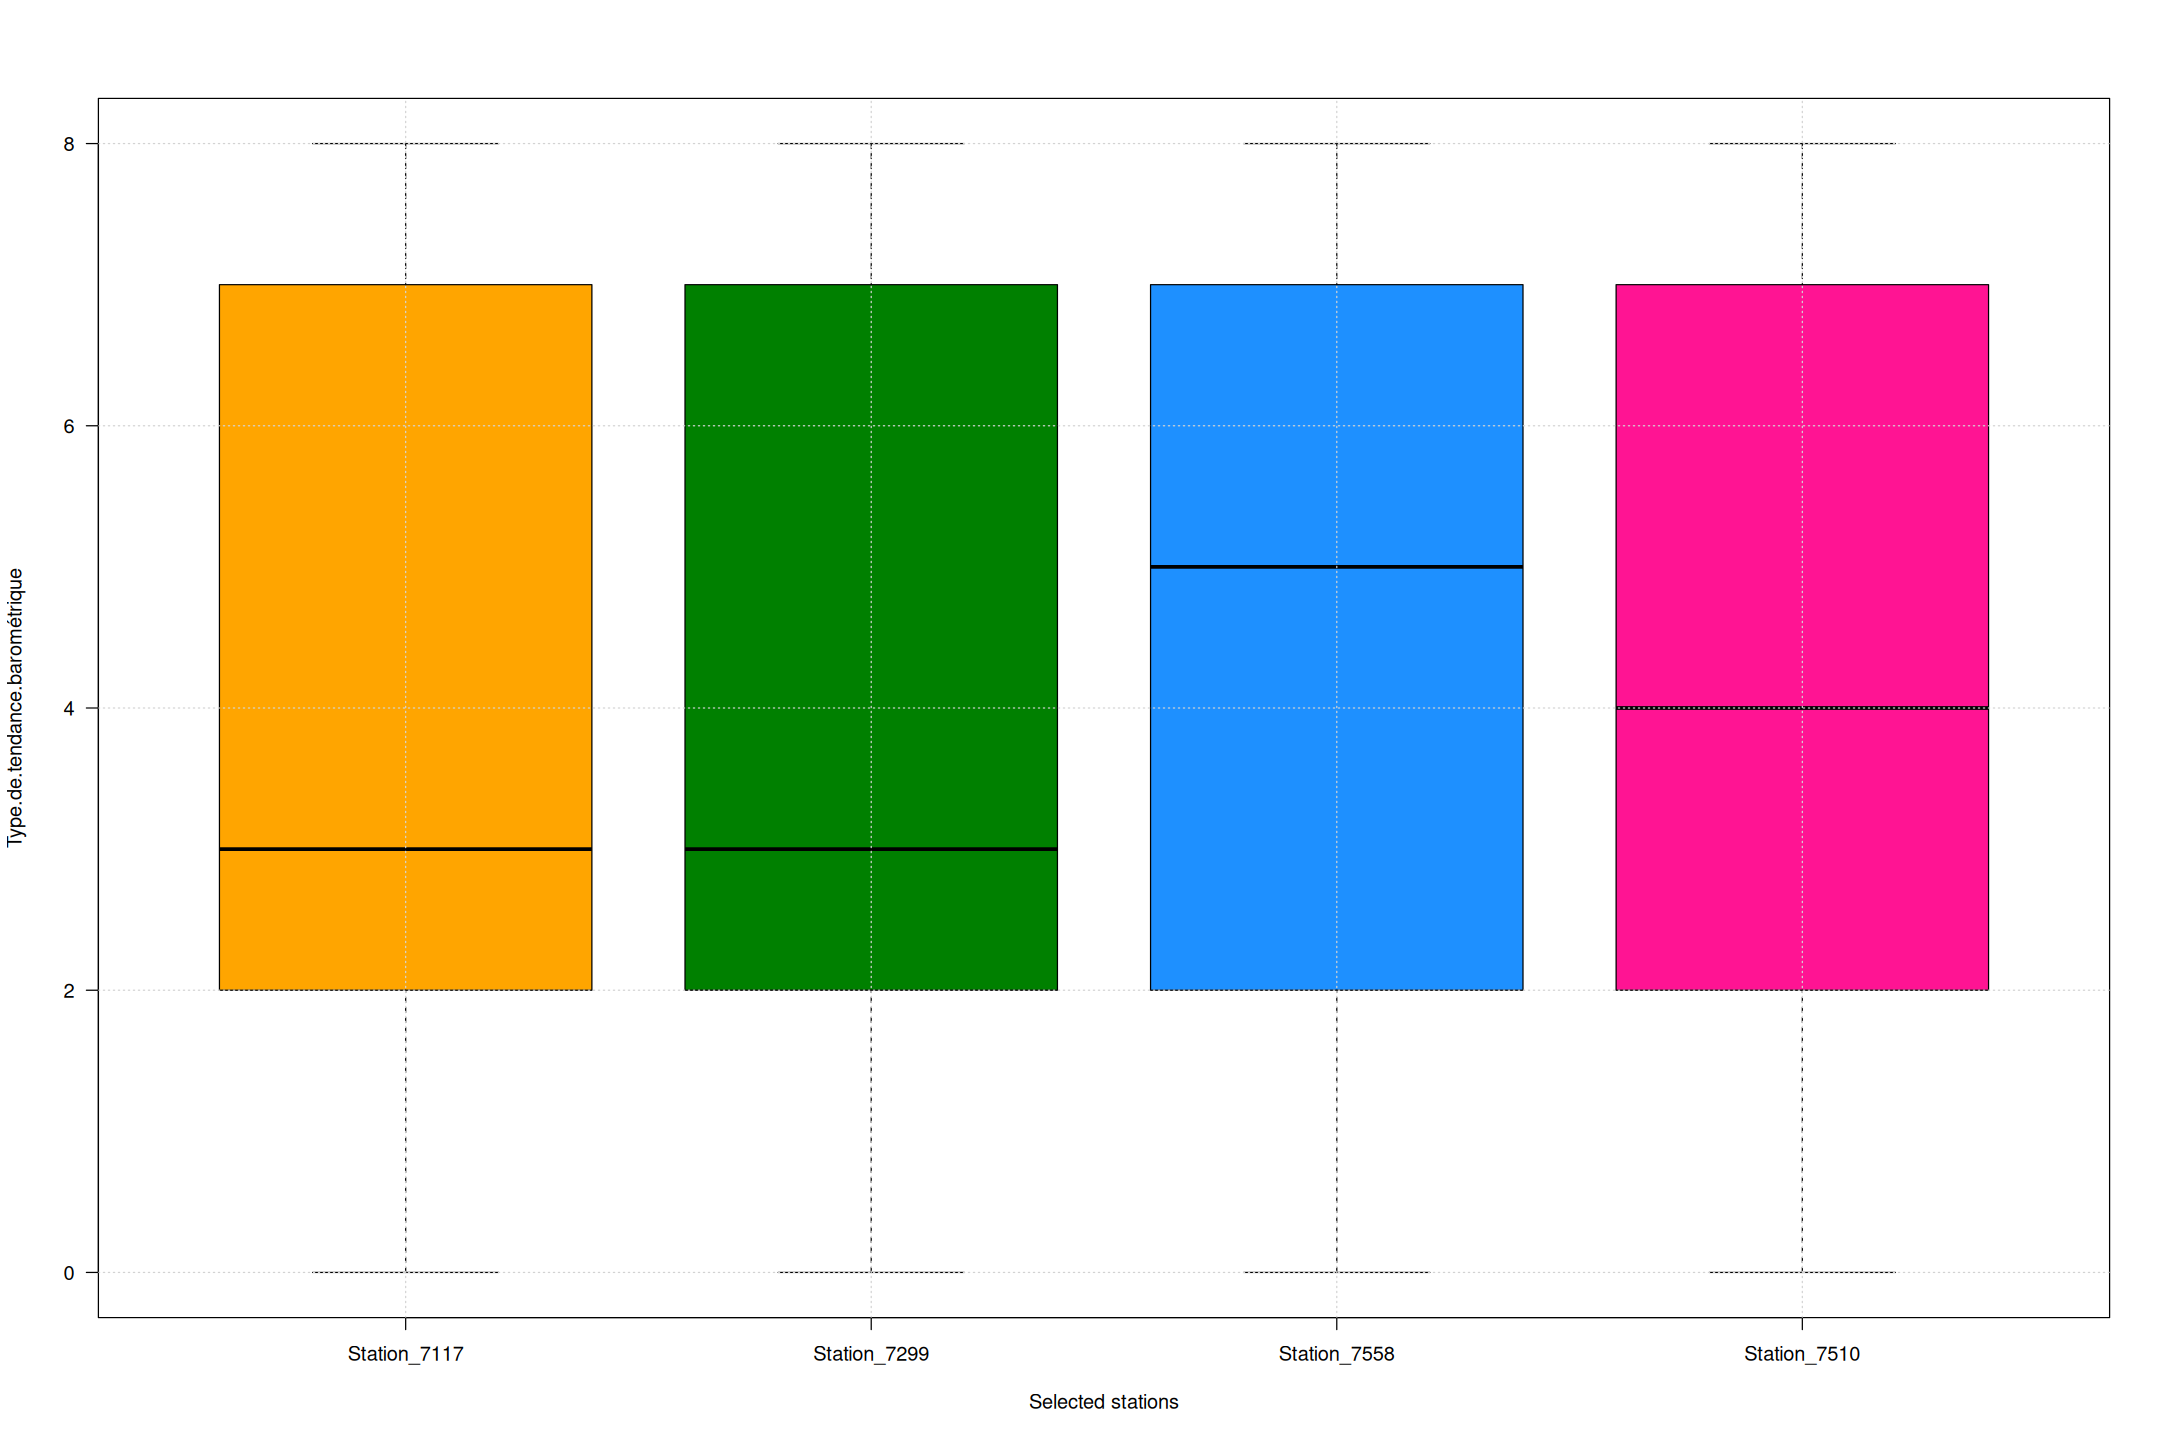

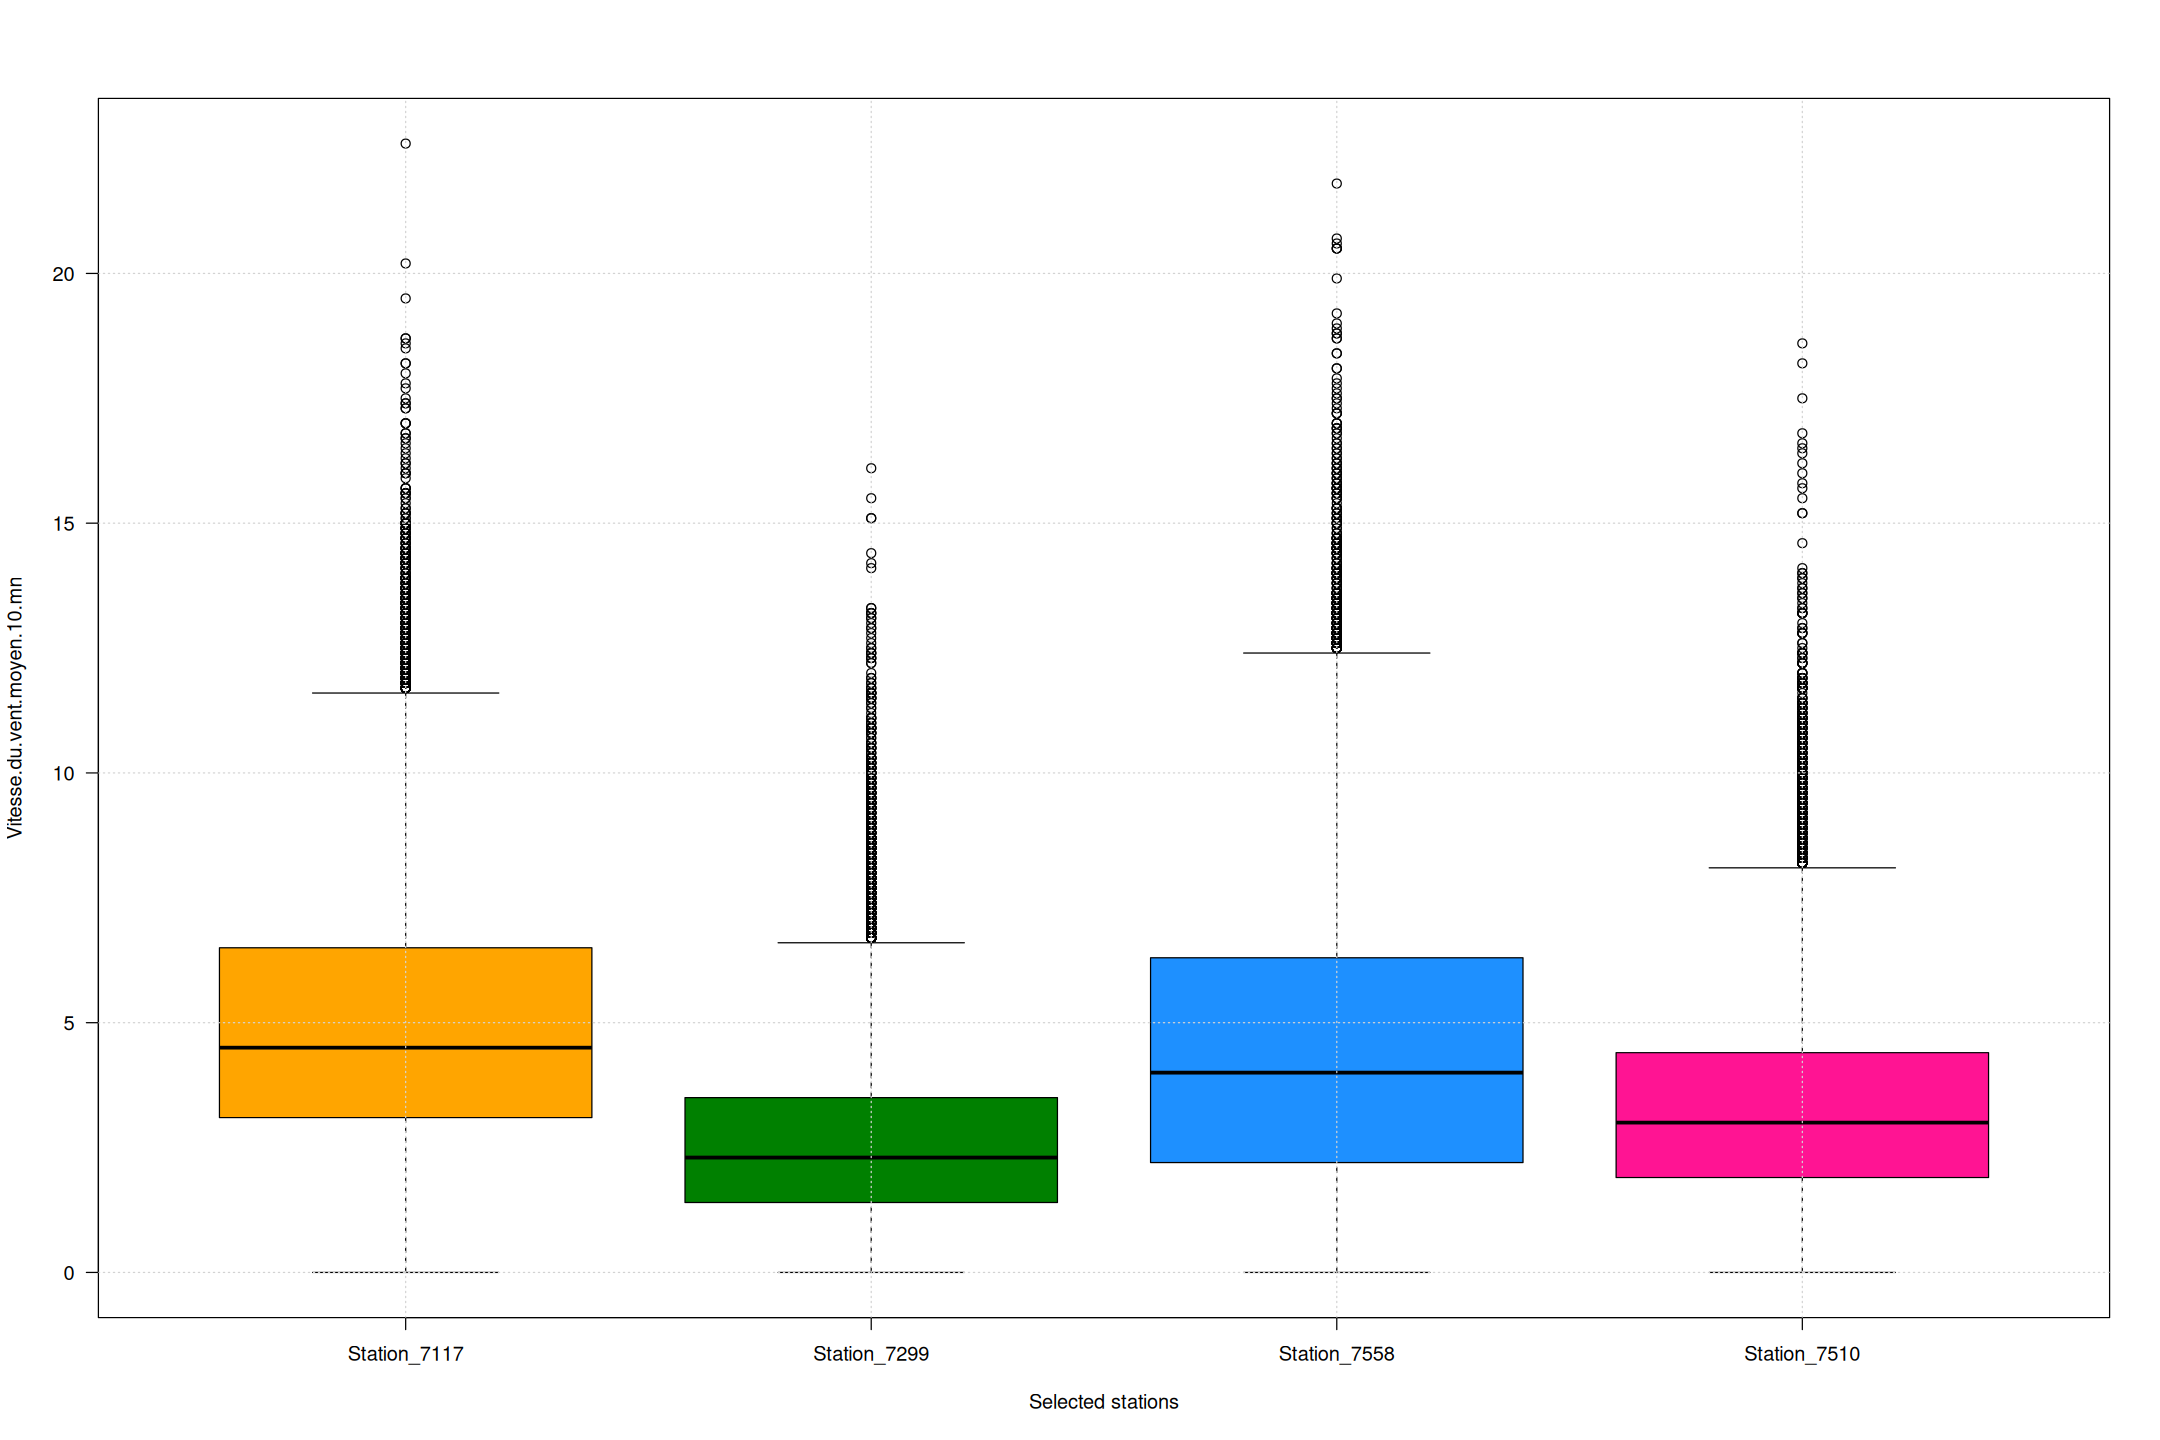

In [29]:
autoboxplot("Pression.au.niveau.mer", chosen_stations)
autoboxplot("Variation.de.pression.en.3.heures", chosen_stations)
autoboxplot("Type.de.tendance.barométrique", chosen_stations)
autoboxplot("Vitesse.du.vent.moyen.10.mn", chosen_stations)


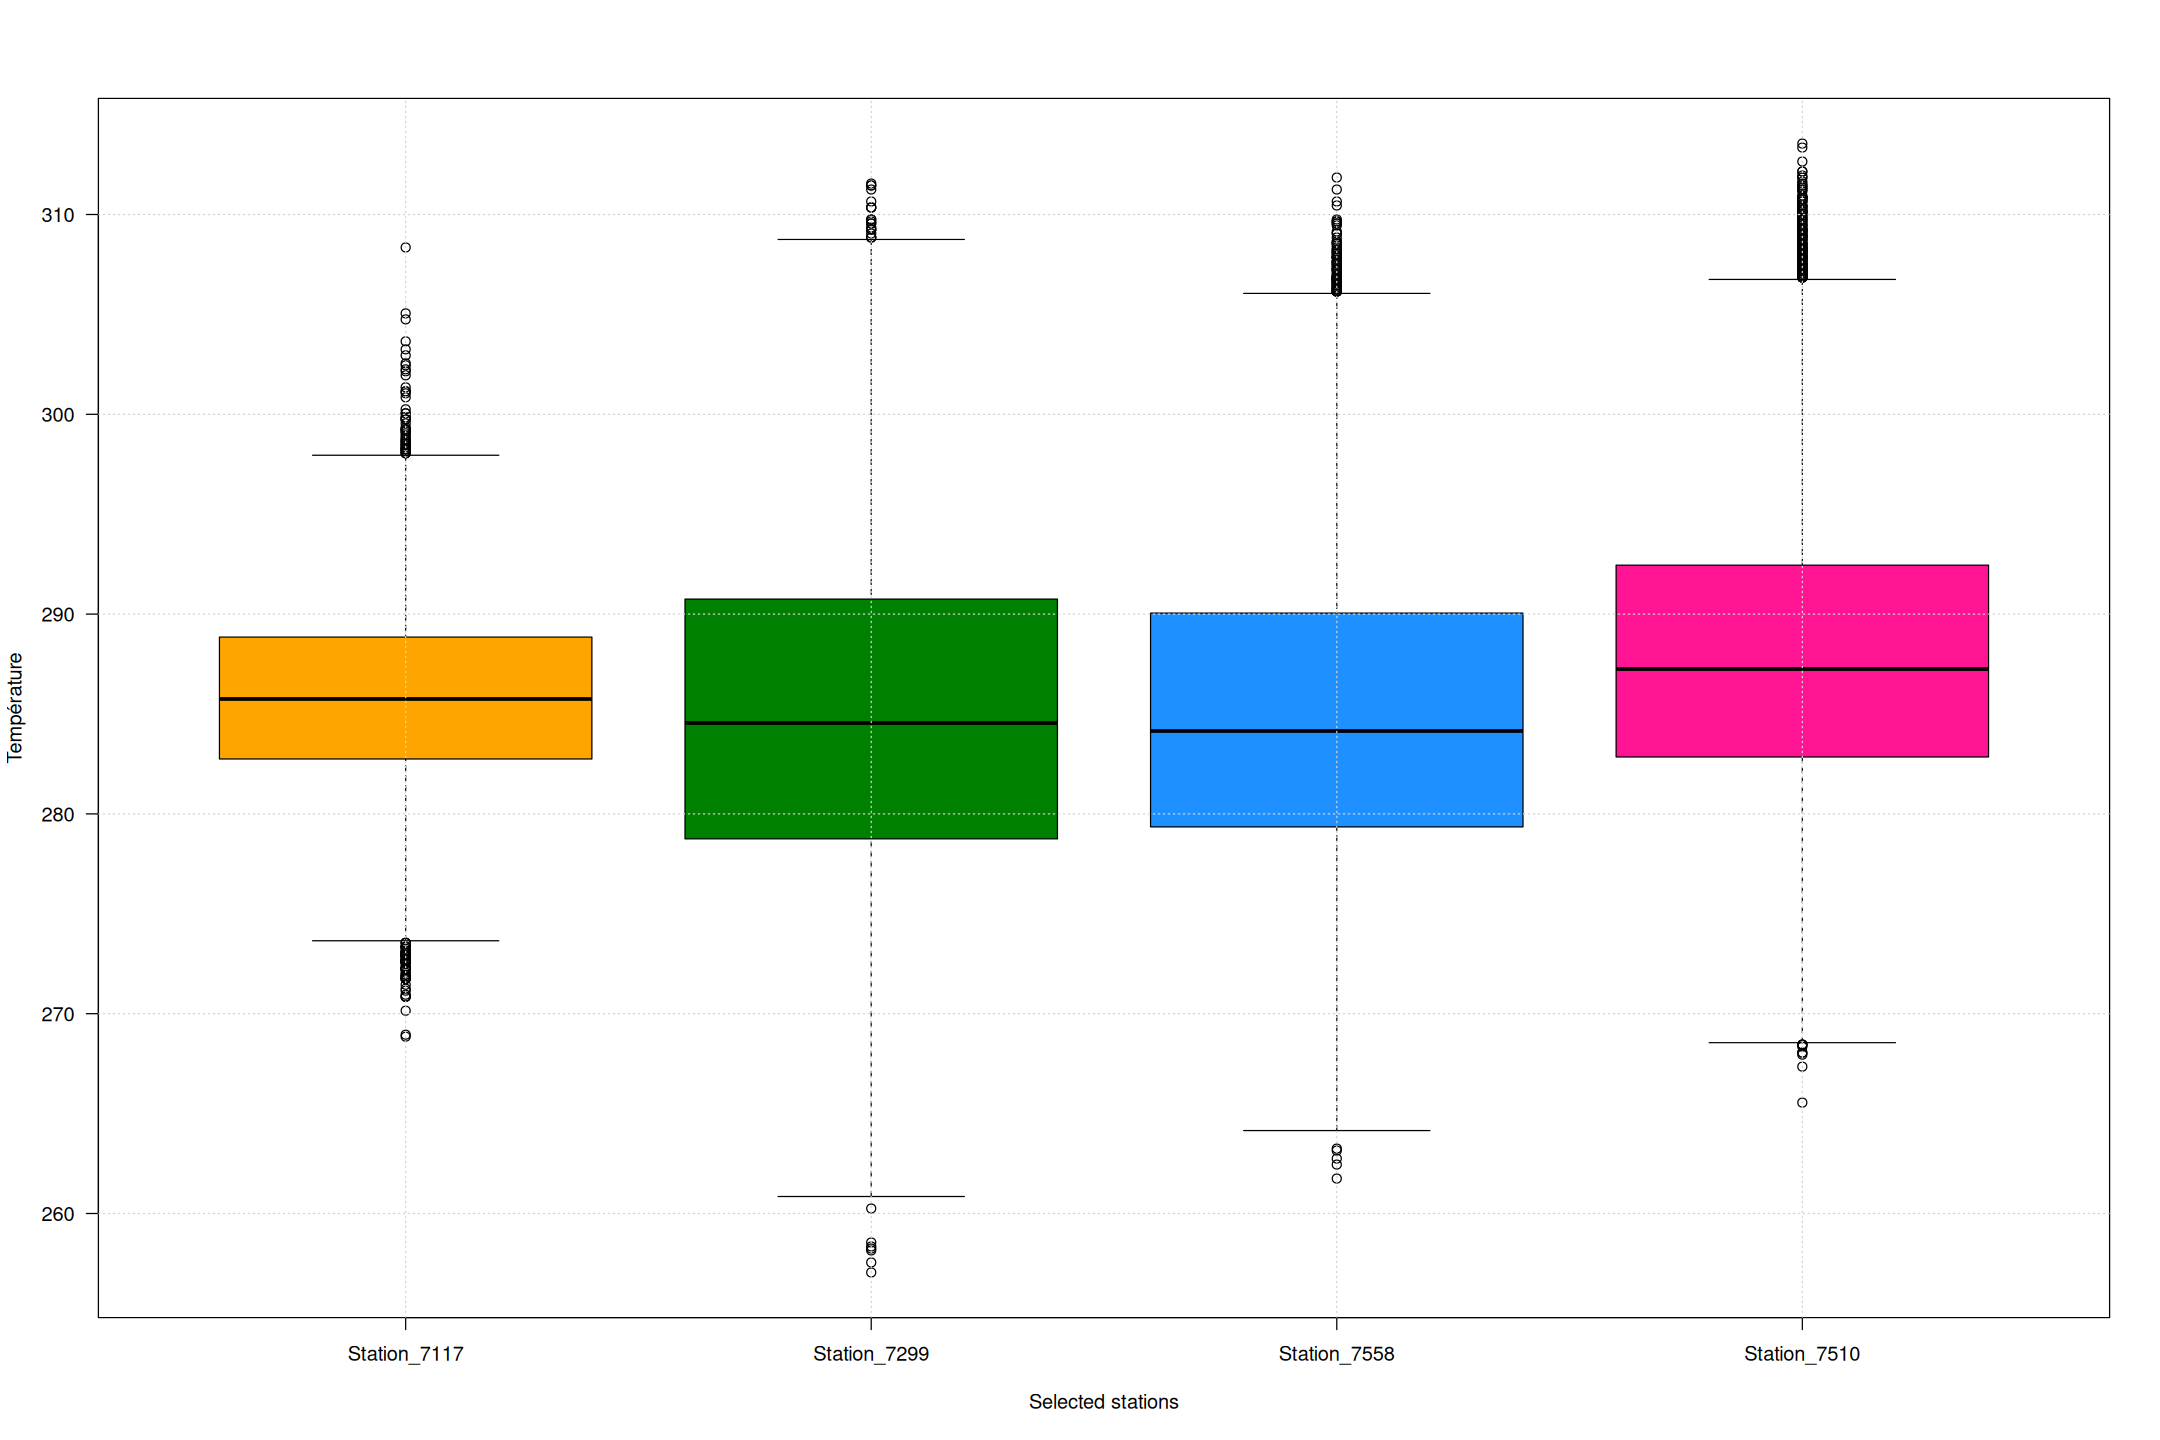

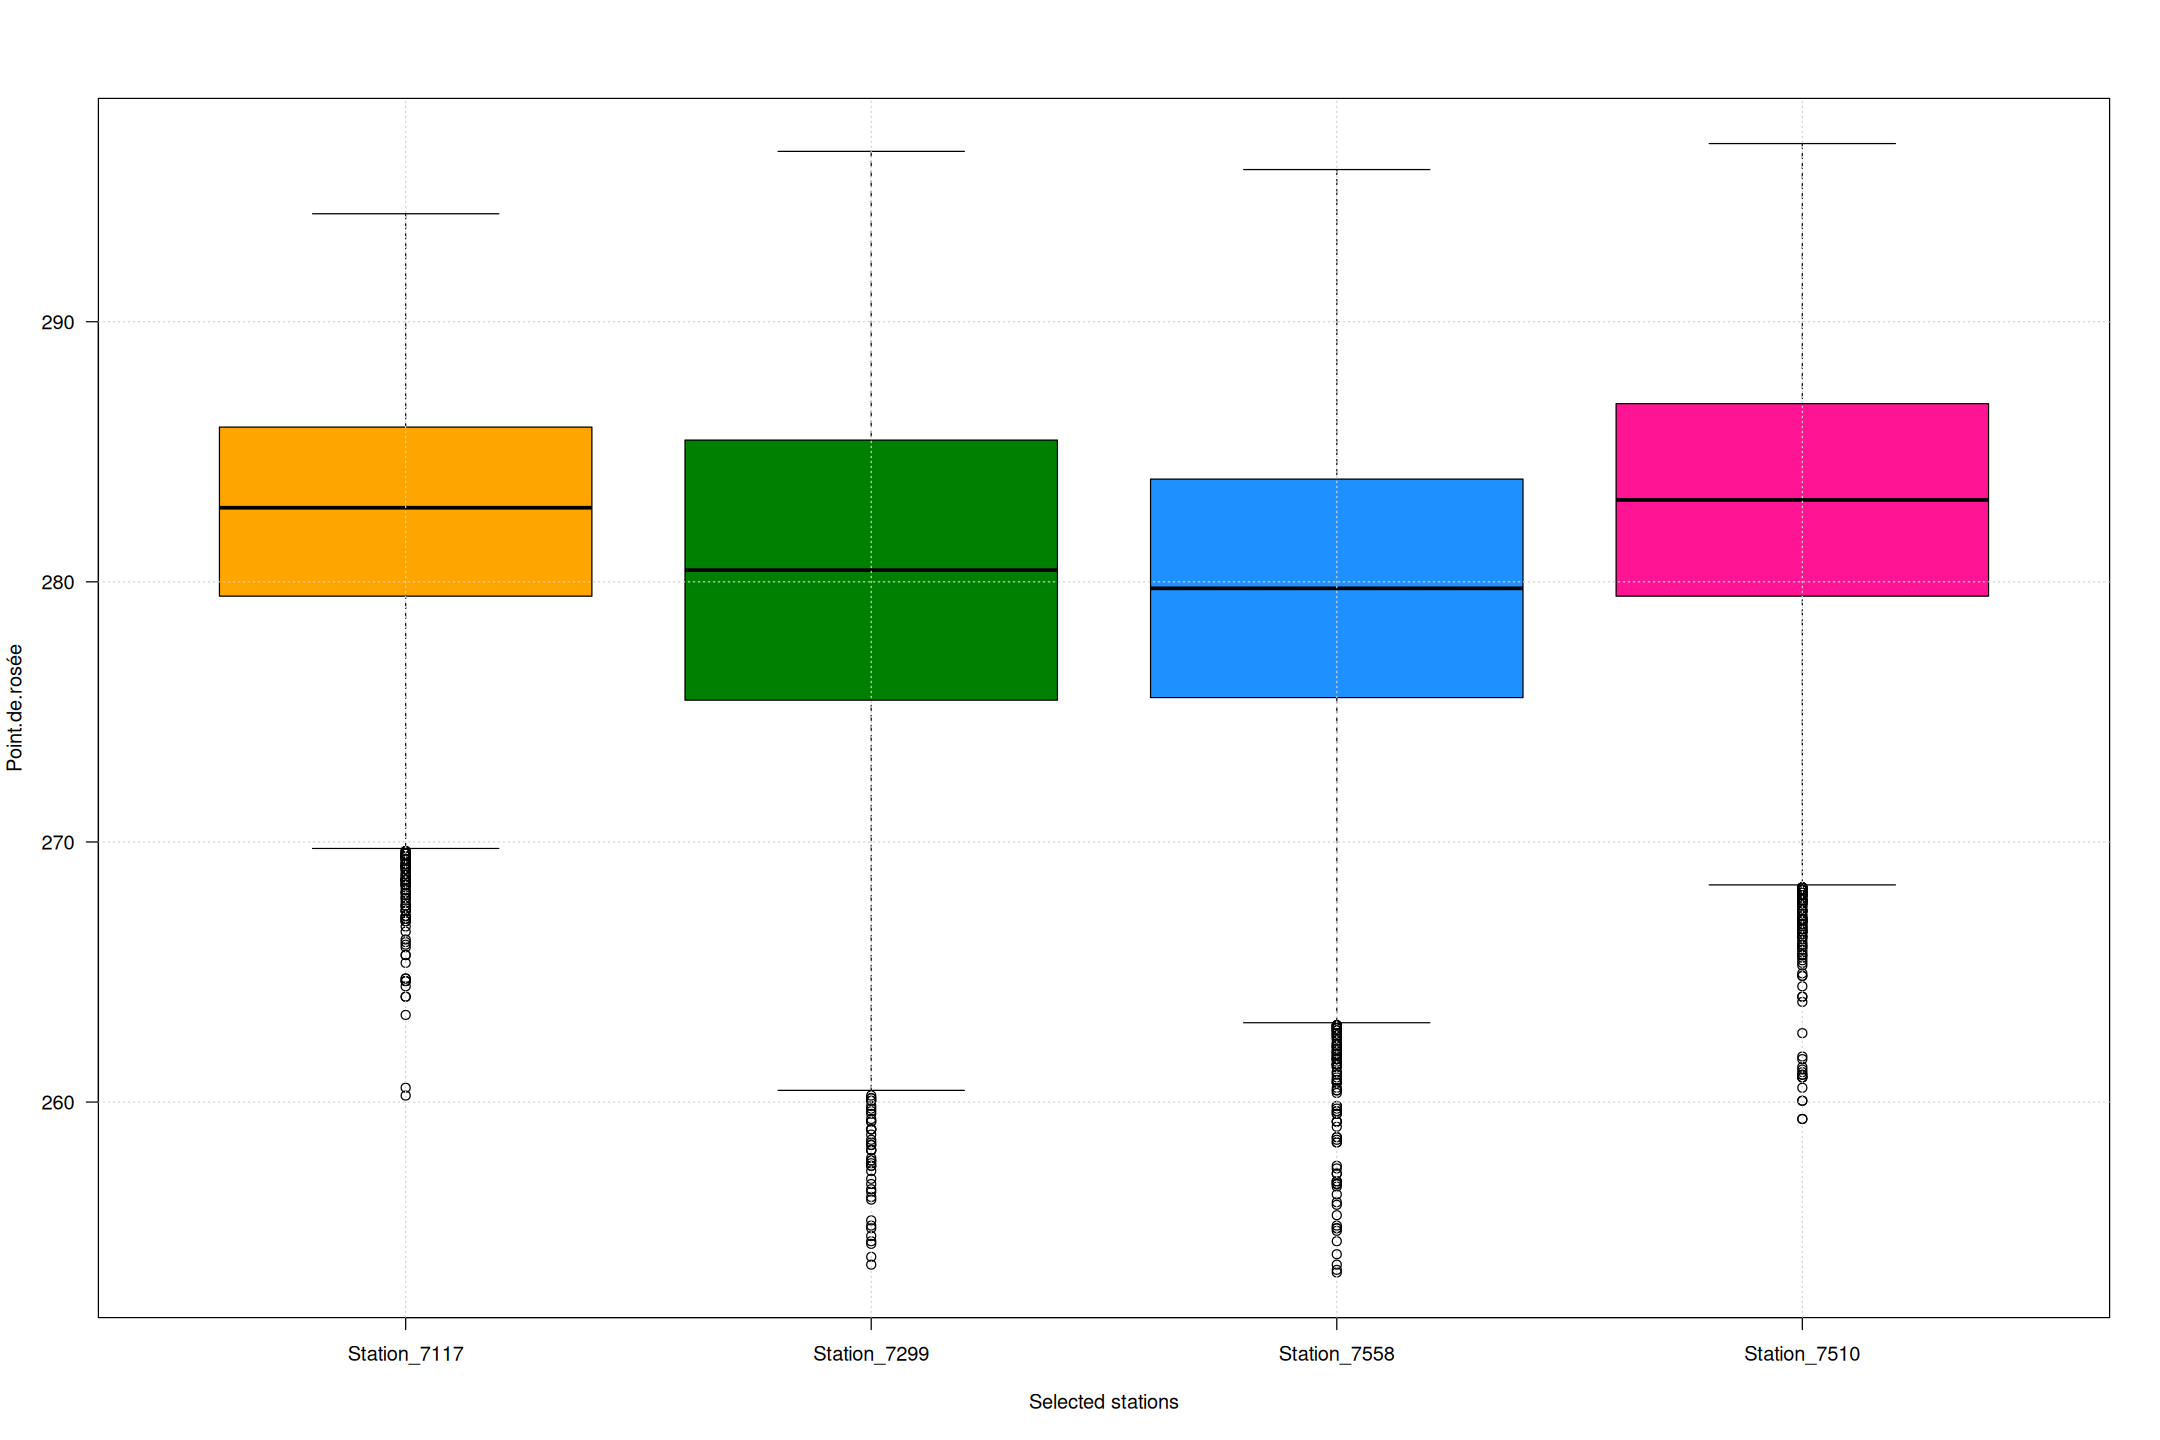

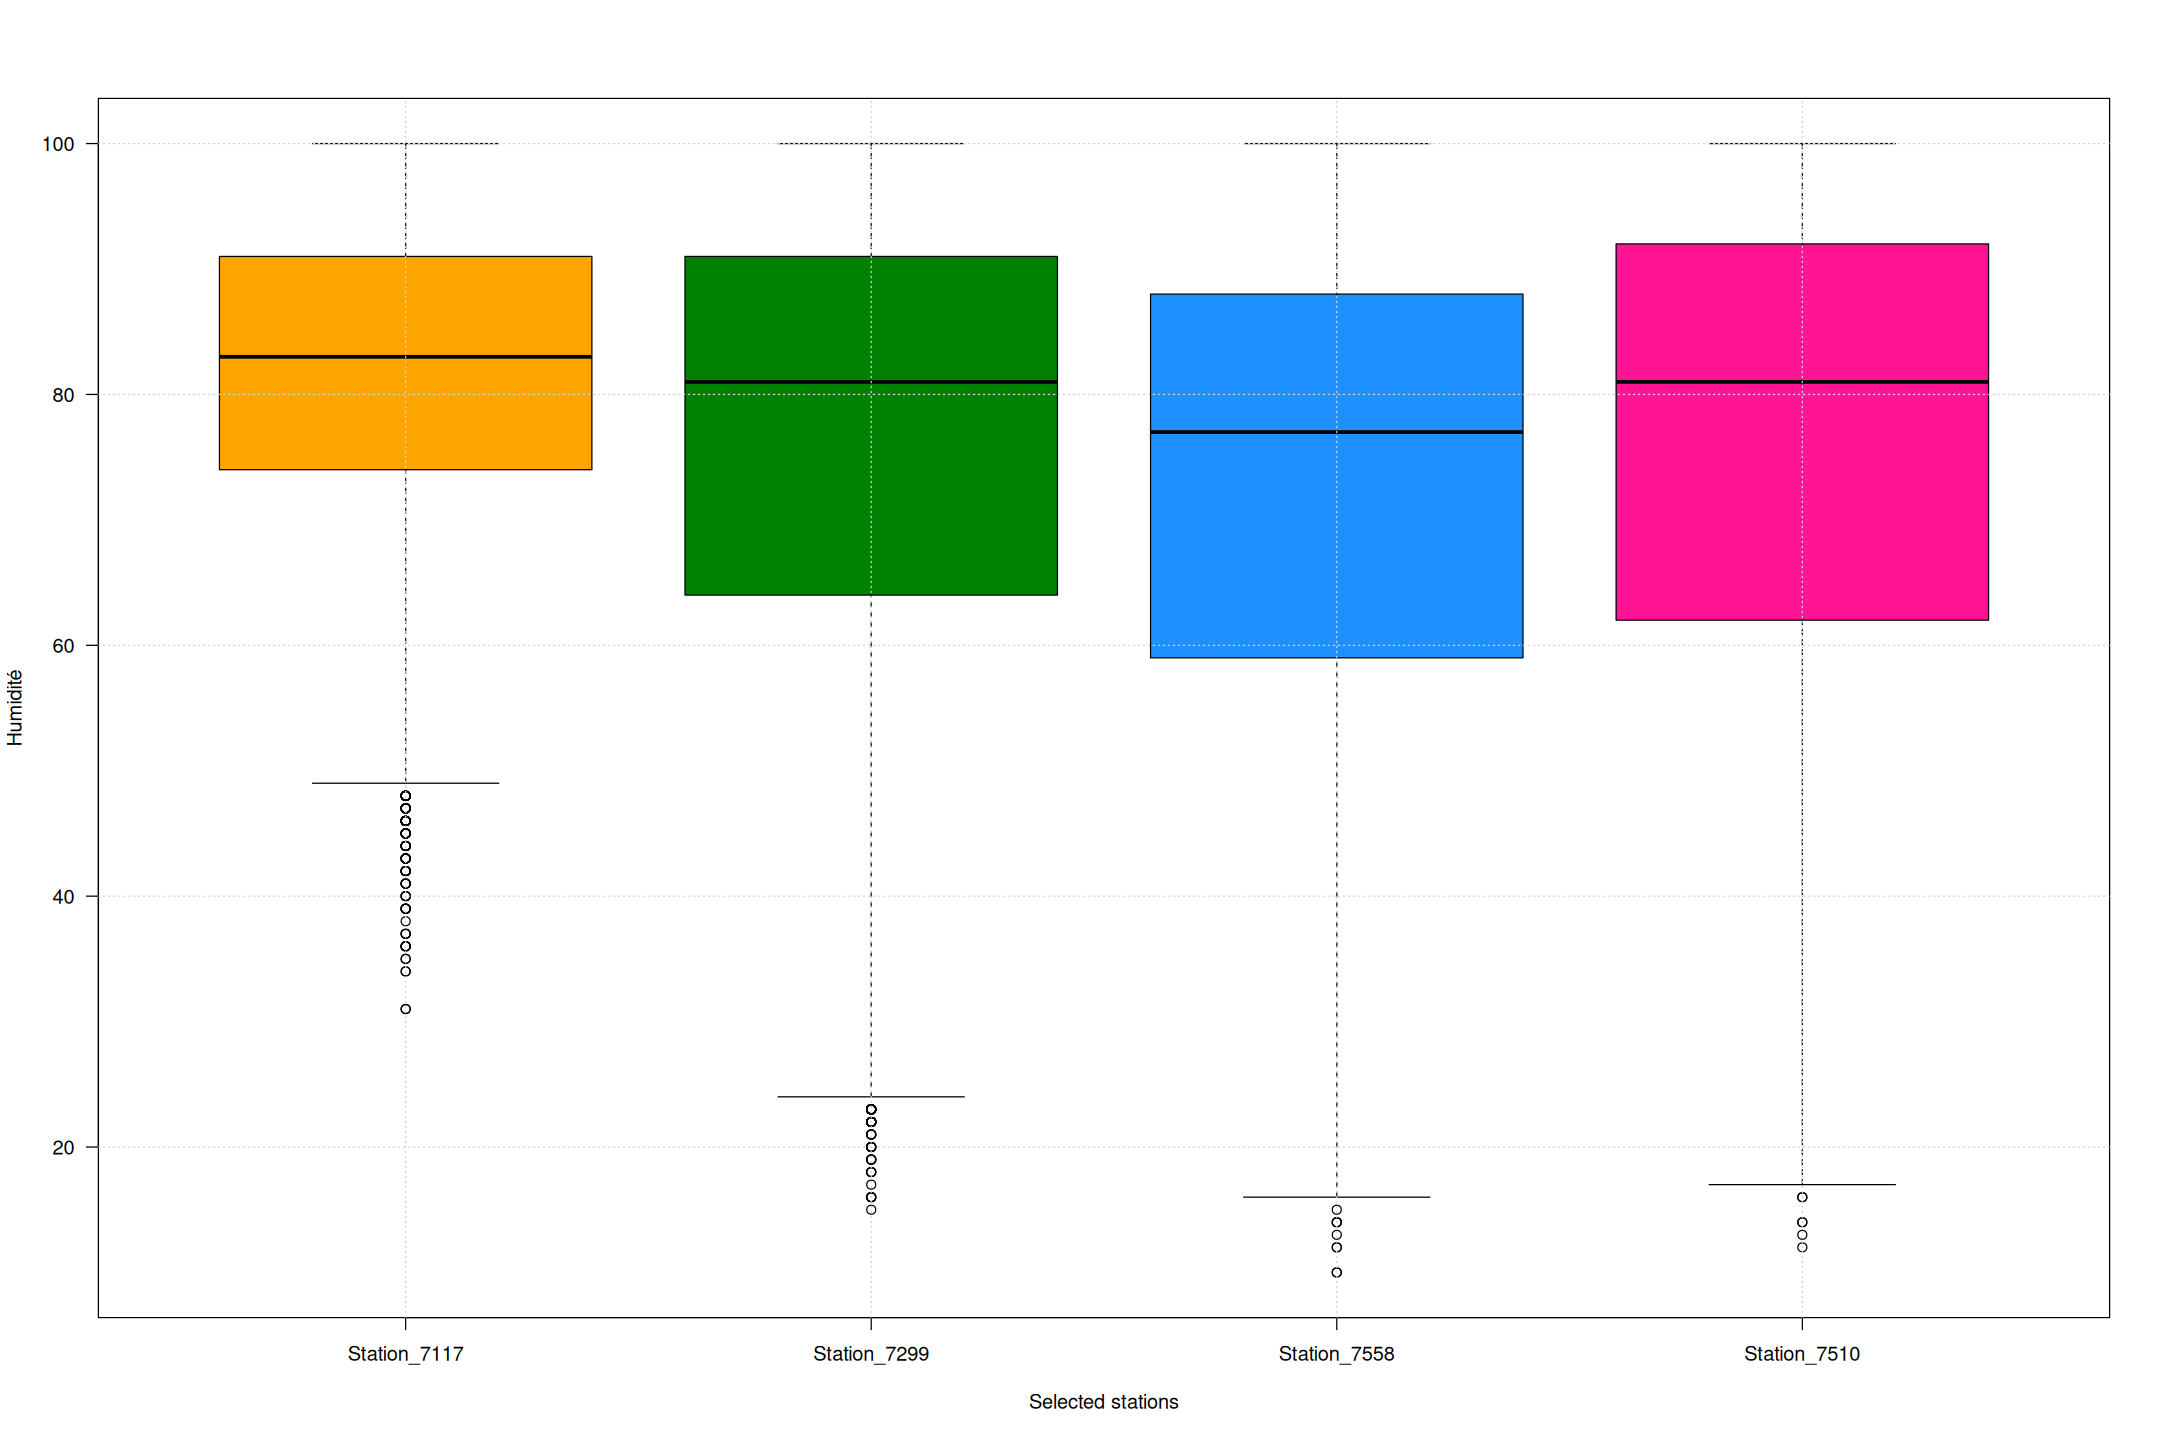

In [30]:

autoboxplot("Température", chosen_stations)
autoboxplot("Point.de.rosée", chosen_stations)
autoboxplot("Humidité", chosen_stations)


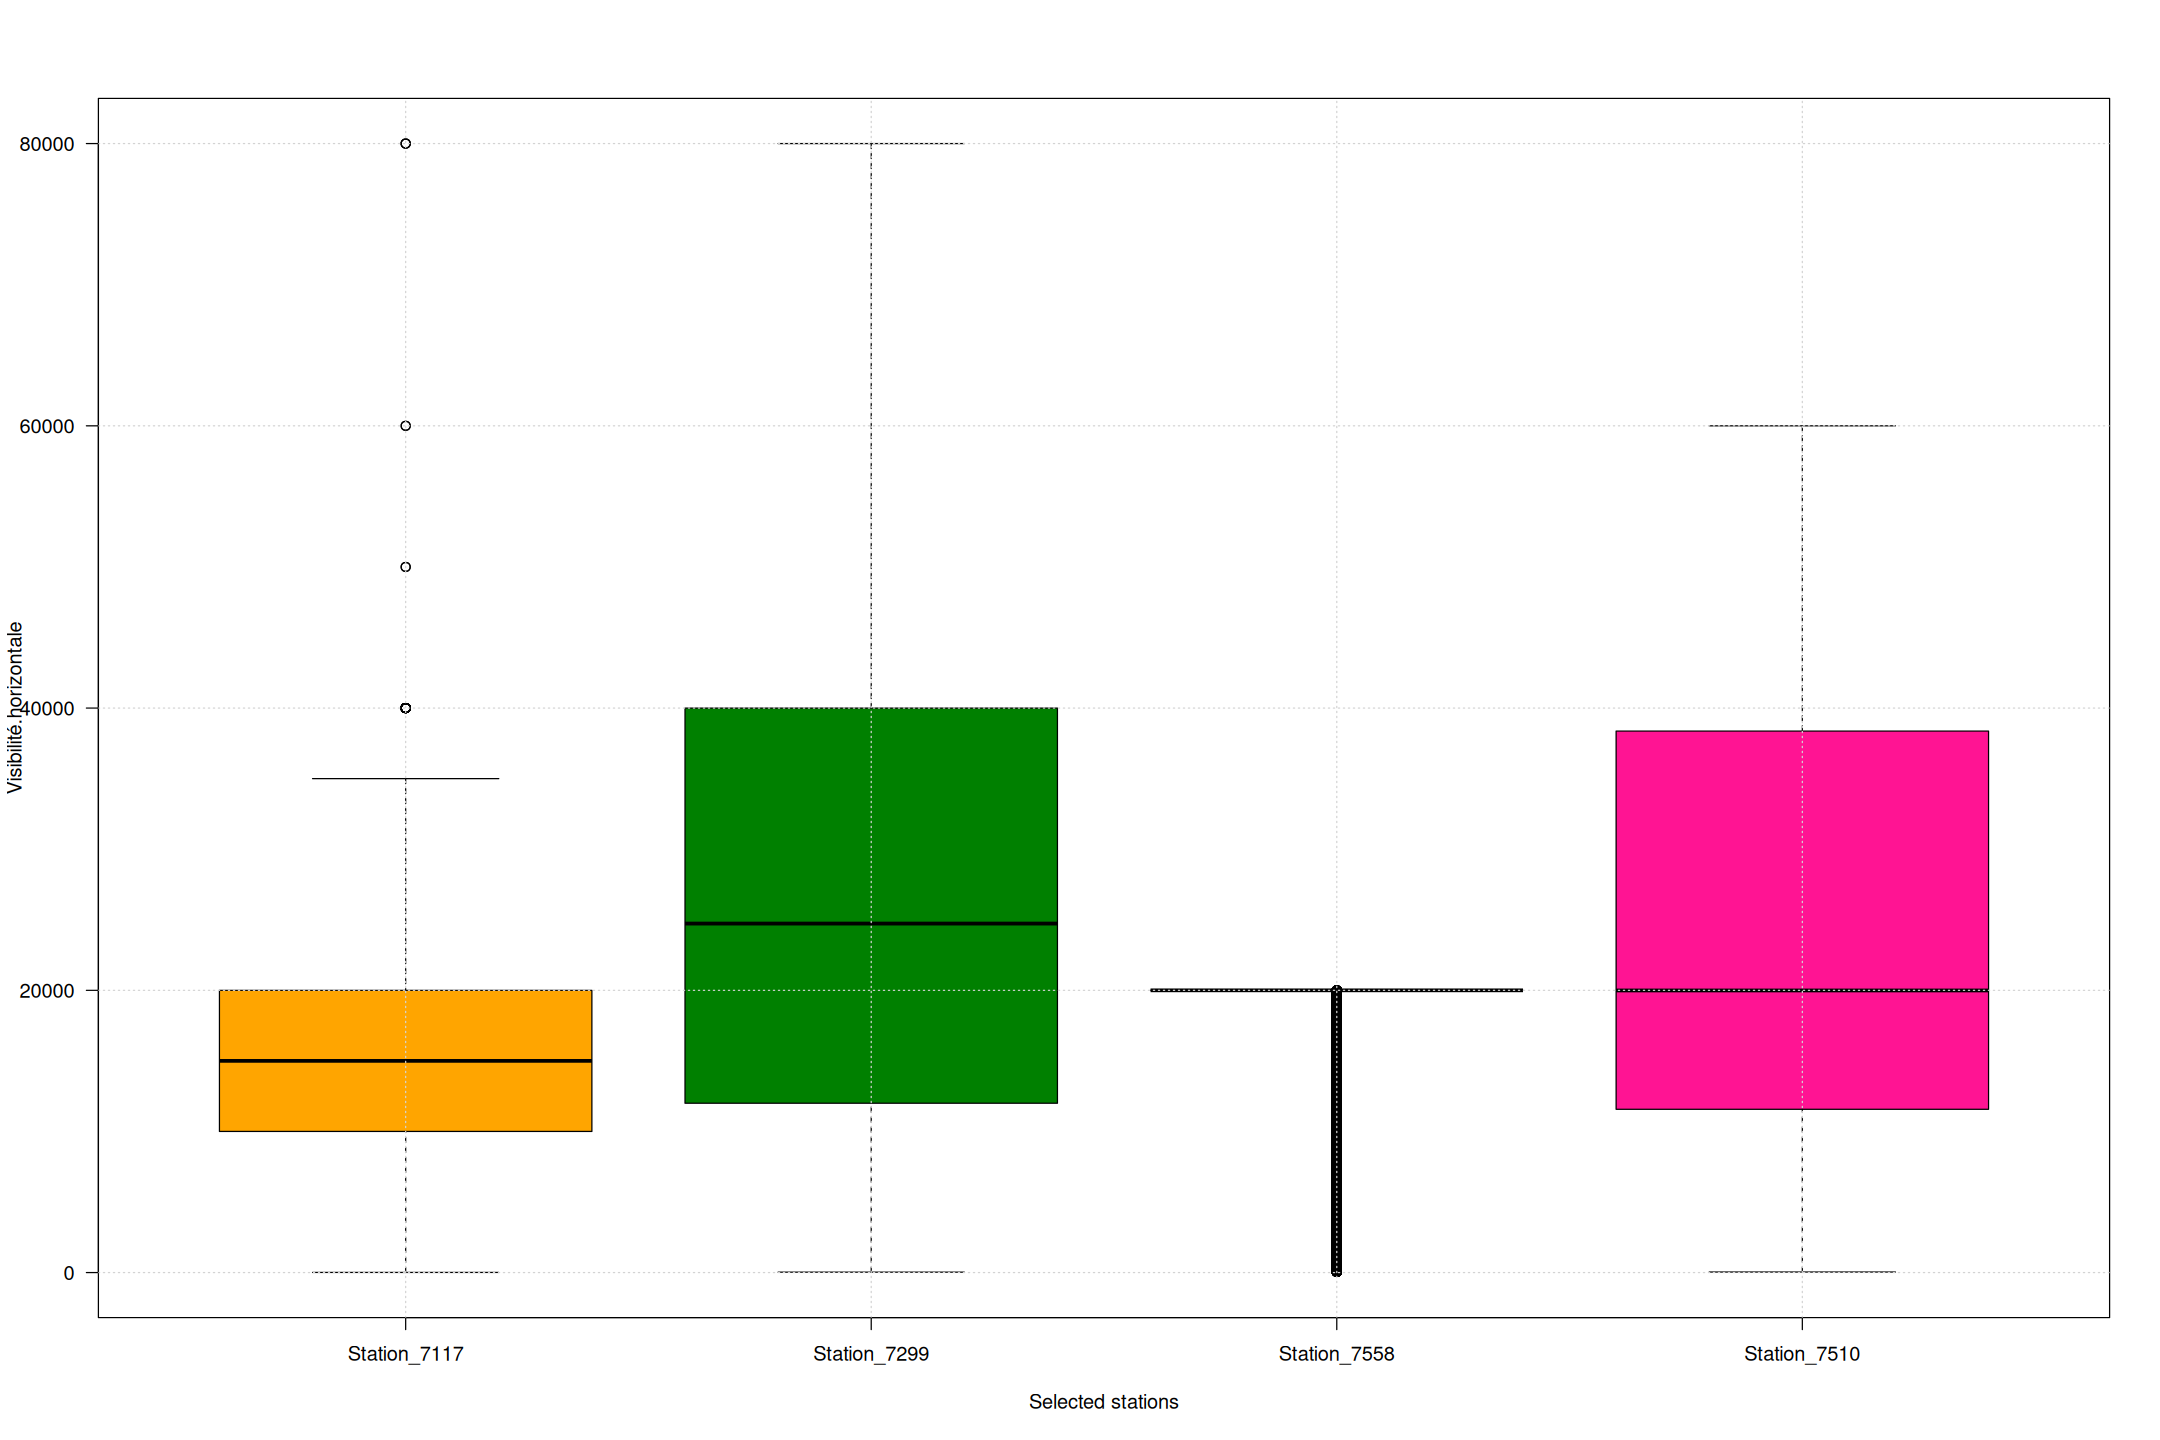

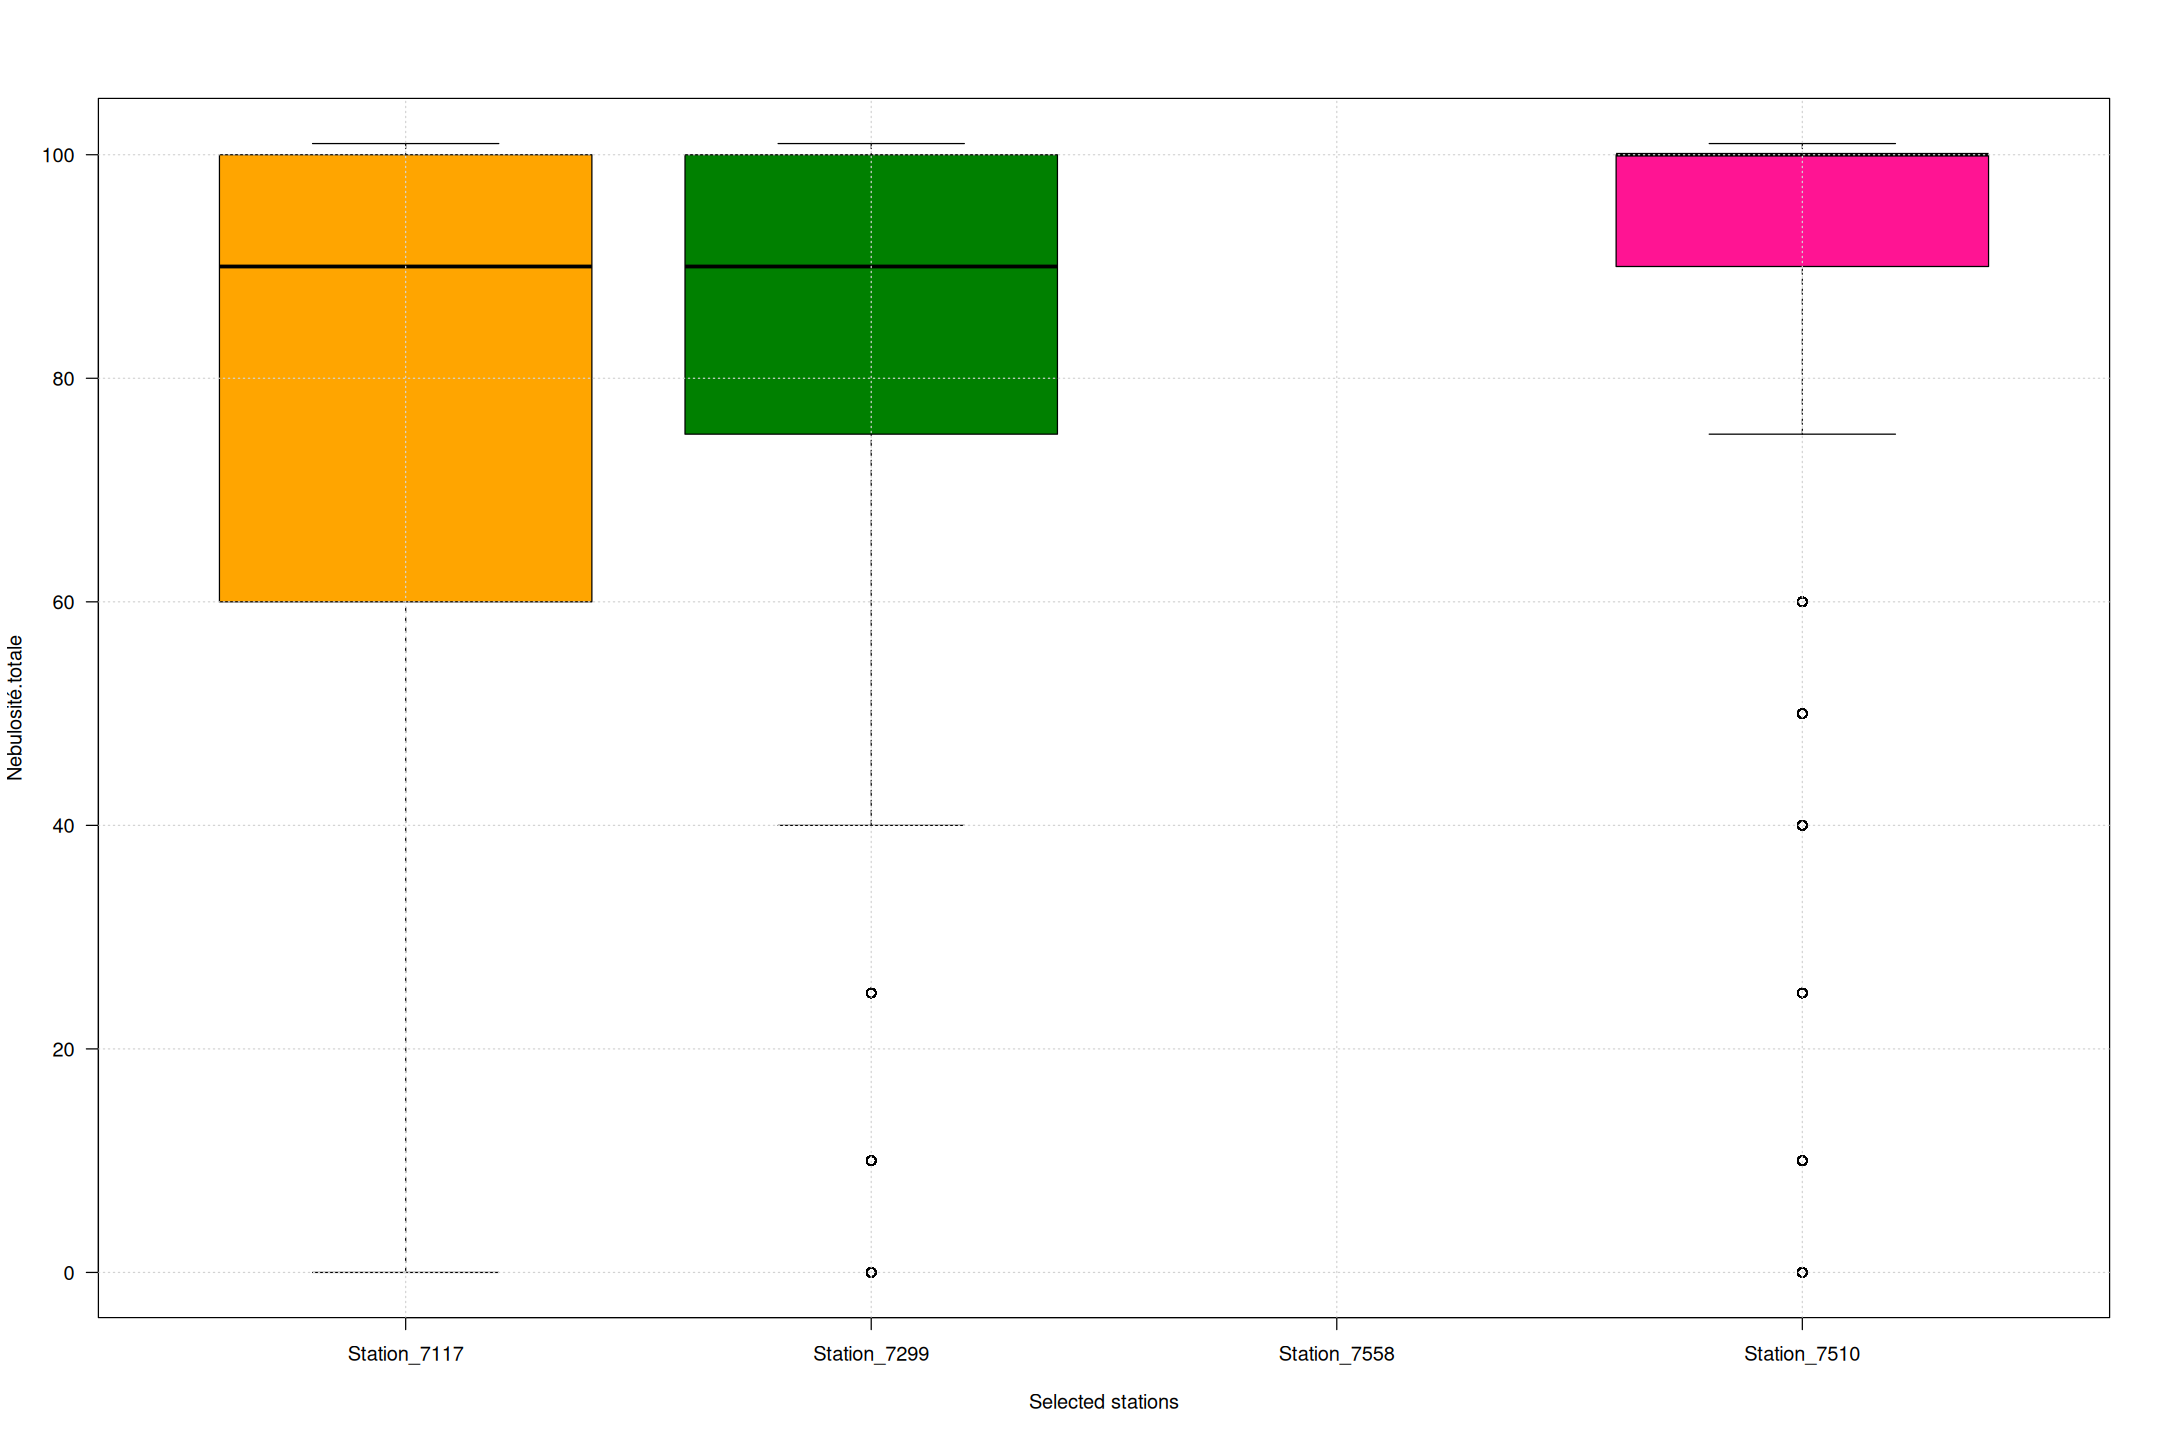

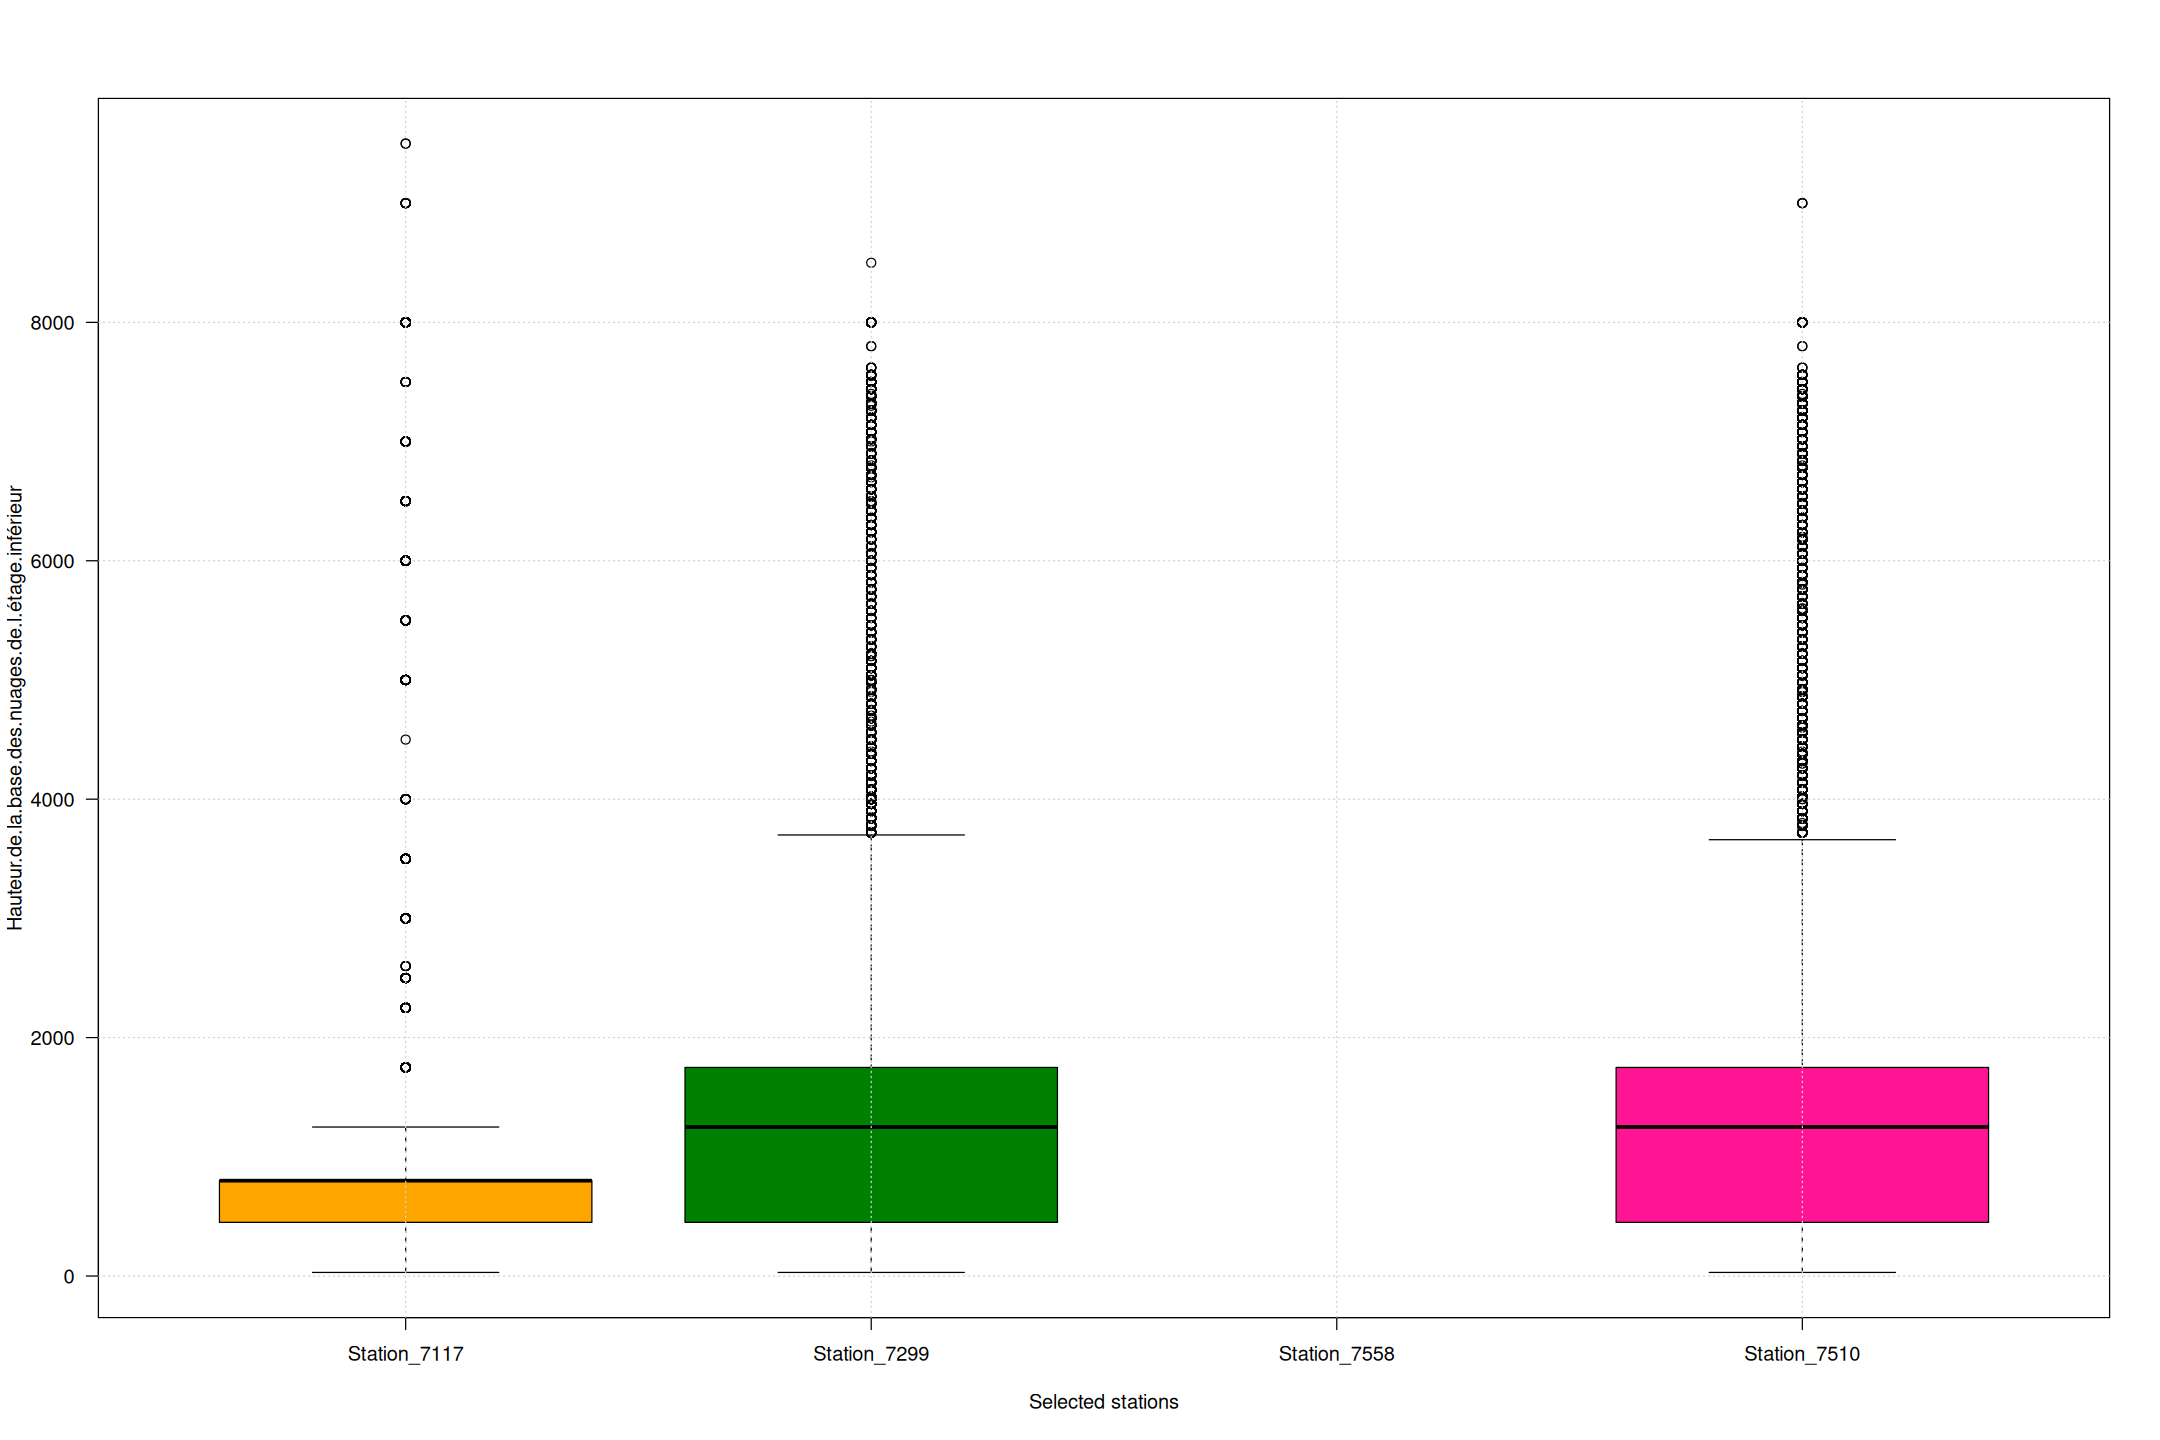

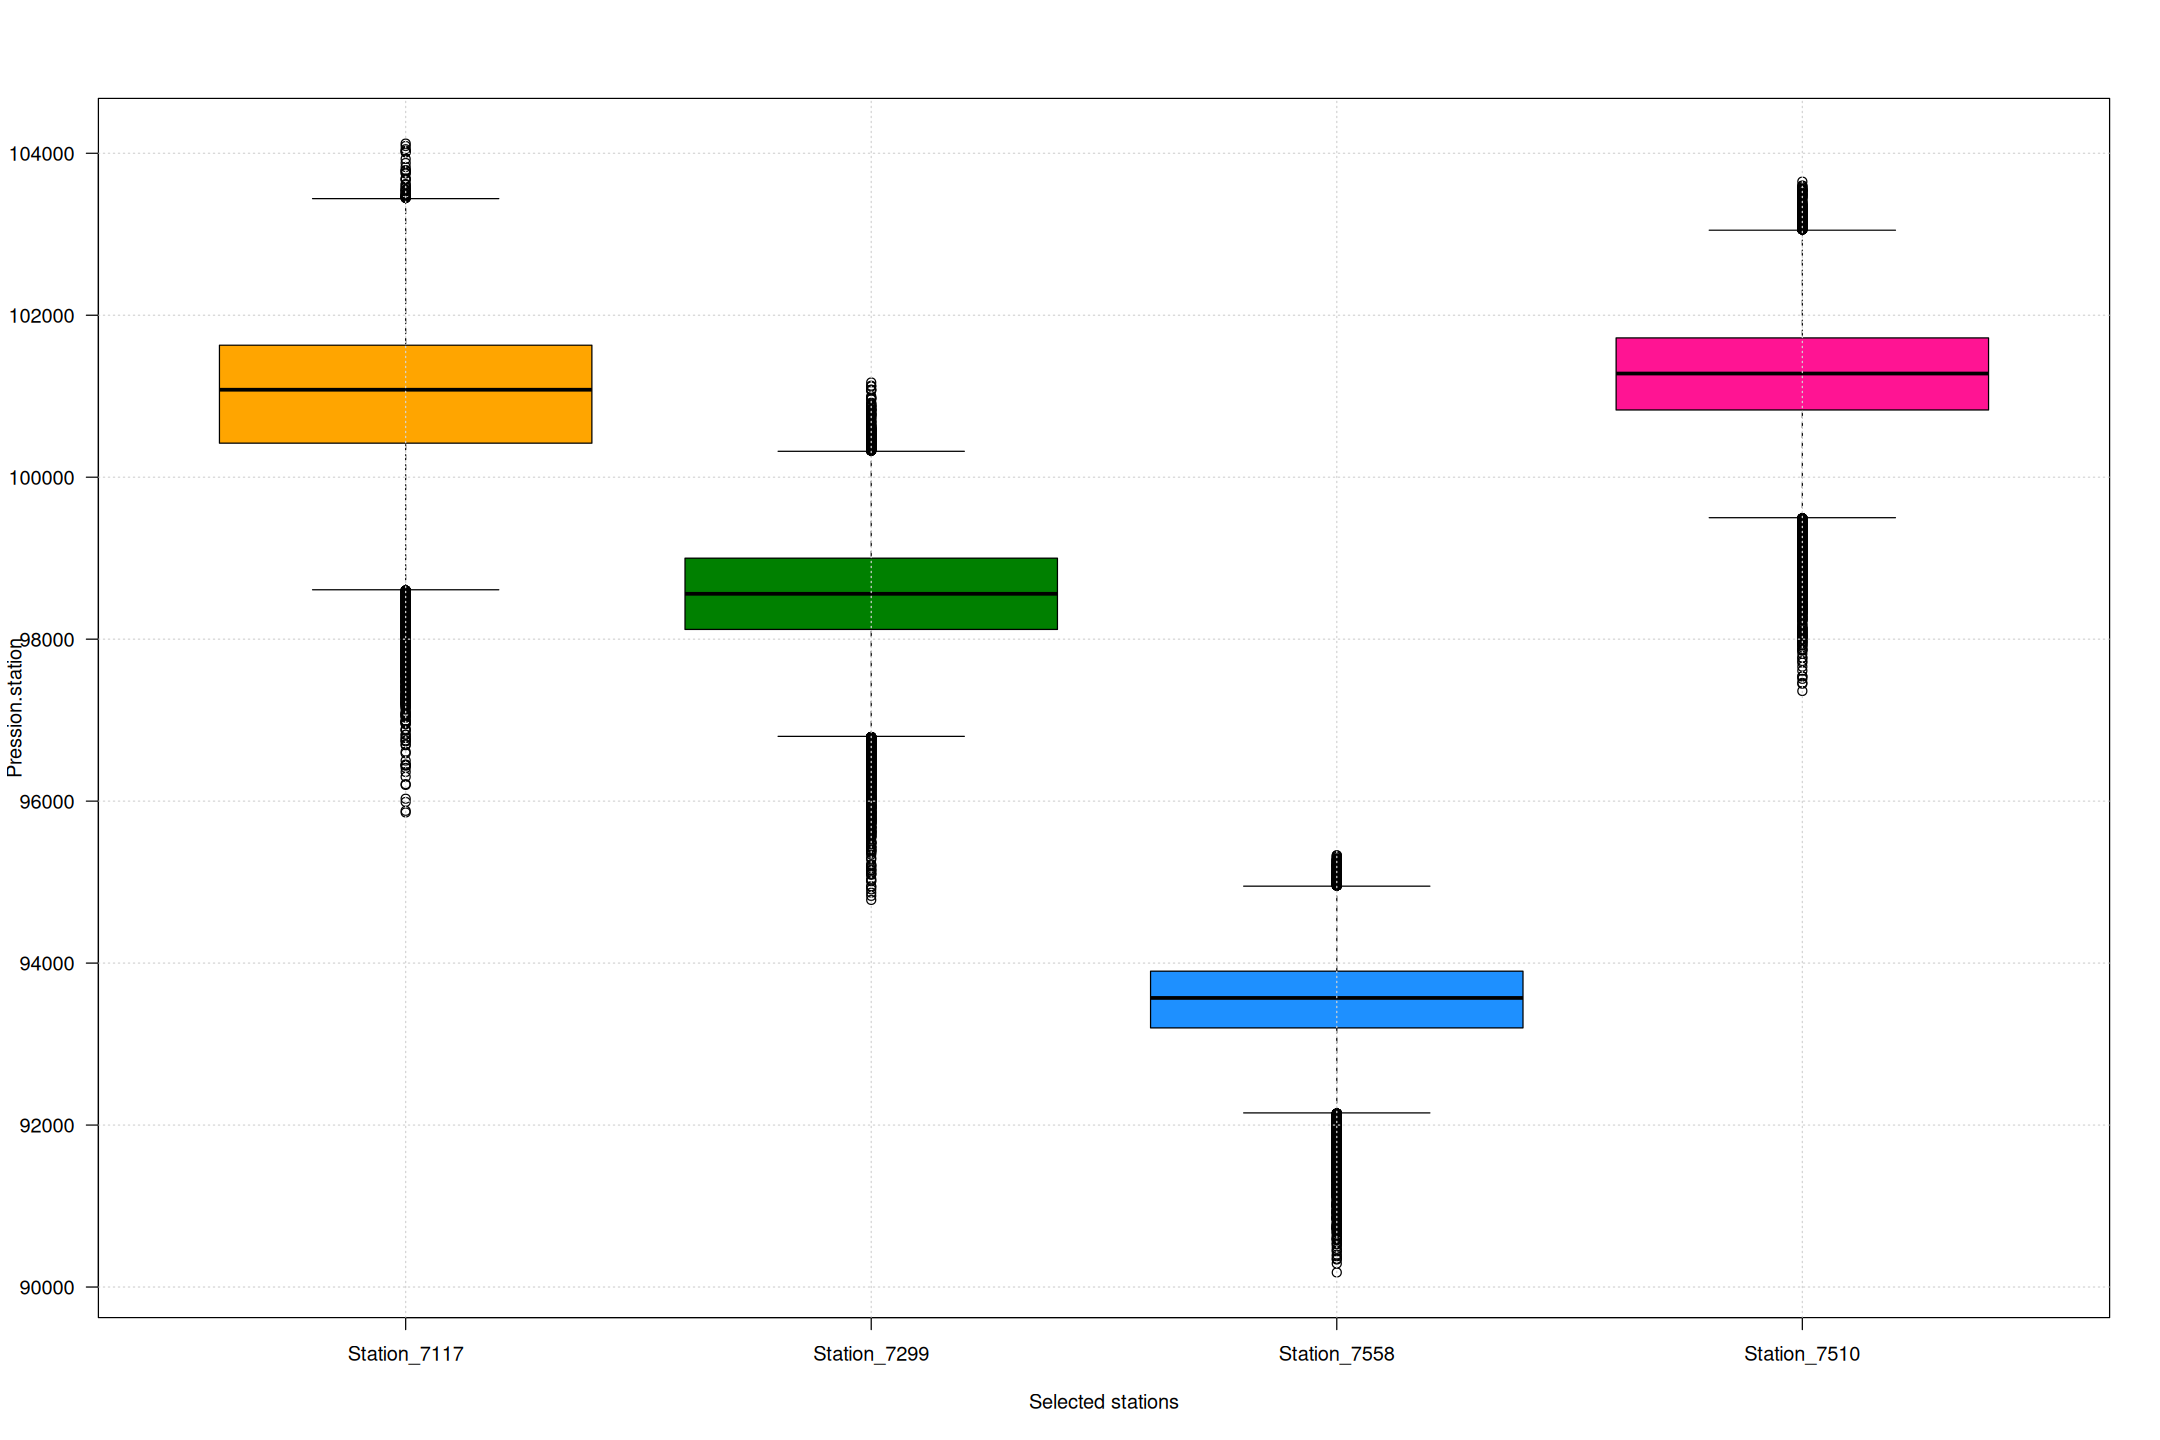

In [31]:

autoboxplot("Visibilité.horizontale", chosen_stations)
autoboxplot("Nebulosité.totale", chosen_stations)
autoboxplot("Hauteur.de.la.base.des.nuages.de.l.étage.inférieur", chosen_stations)
autoboxplot("Pression.station", chosen_stations)


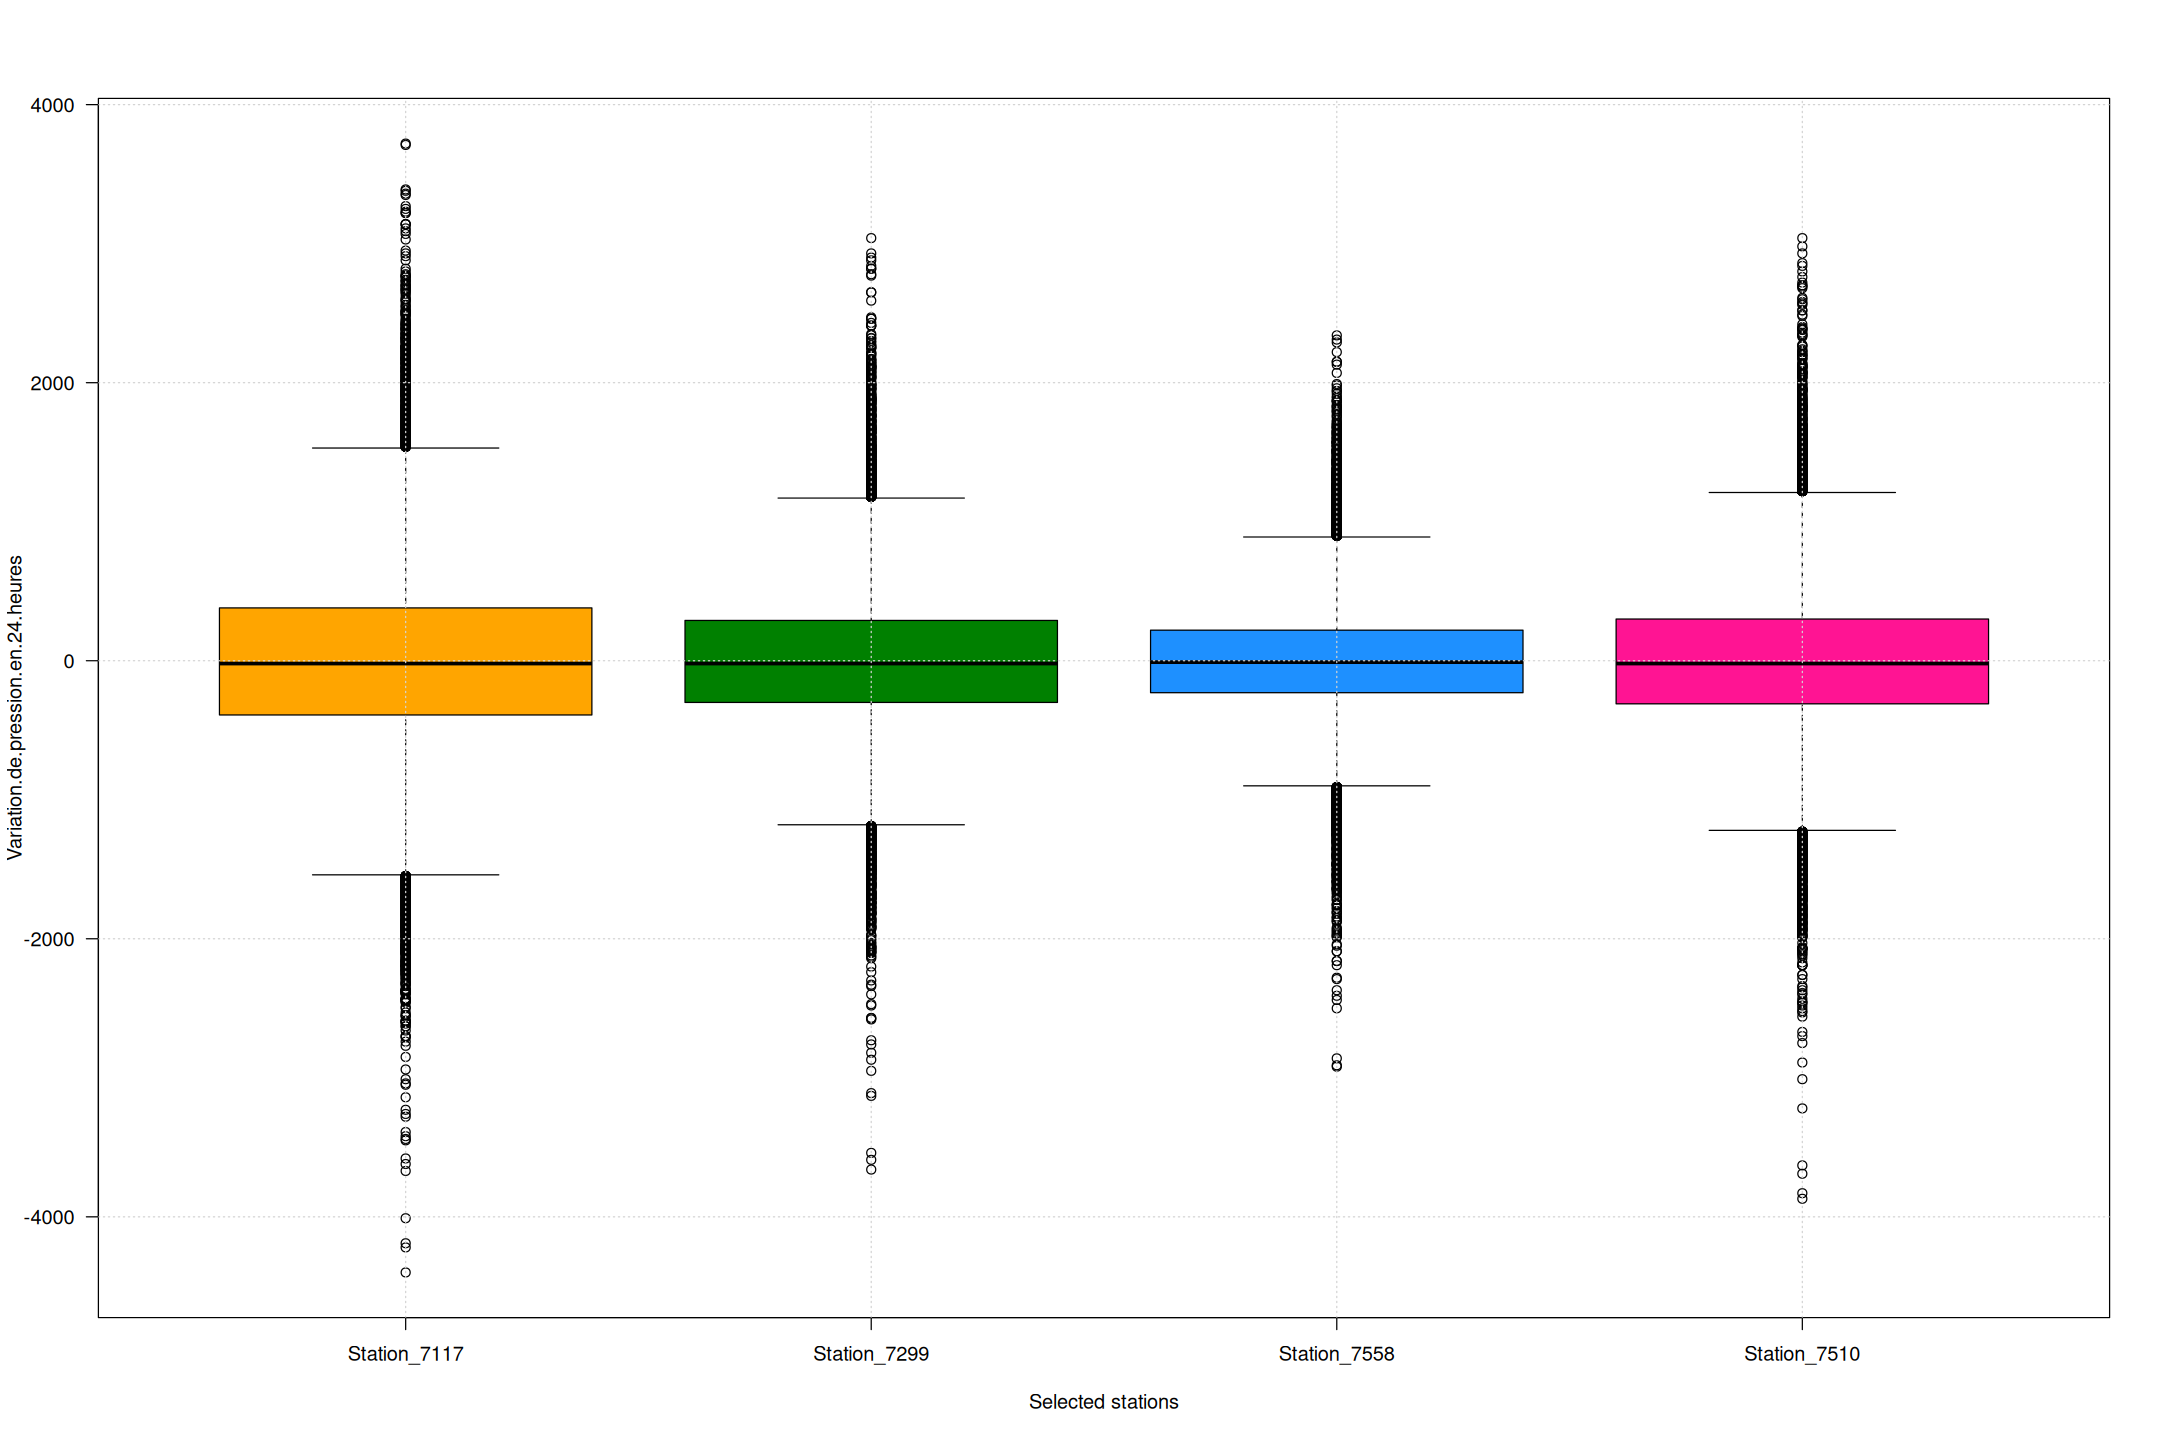

In [34]:

autoboxplot("Variation.de.pression.en.24.heures", chosen_stations)
